In [1]:
import getpass
user = getpass.getuser()
from omni.isaac.kit import SimulationApp
# Set the path below to your desired nucleus server
CONFIG = {"renderer":"PathTracing", "headless":True, "width":1024, "height":800, "sync_loads": True}
kit = simulation_app = SimulationApp(launch_config=CONFIG)

Passing the following args to the base kit application:  ['-f', '/home/student/.local/share/jupyter/runtime/kernel-546afe7a-7a5a-4c2c-a048-51ab00de03c4.json']
[Warning] [omni.kit.app.plugin] No crash reporter present, dumps uploading isn't available.
[Info] [carb] Logging to file: /home/student/.local/share/ov/pkg/isaac_sim-2021.2.1/kit/logs/Kit/Isaac-Sim/2021.2/kit_20220506_001405.log
2022-05-05 22:14:05 s] [Warning] [omni.ext.plugin] [ext: omni.jetbot.opencv] Extensions config 'extension.toml' doesn't exist anywhere in '/home/student/.local/share/ov/pkg/isaac_sim-2021.2.1/exts/omni.jetbot.opencv/**'
[0.044s] [ext: omni.kit.pipapi-0.0.0] startup
[0.054s] [ext: omni.kit.pip_archive-0.0.0] startup
[0.058s] [ext: omni.isaac.pip_archive-0.1.0] startup
[0.218s] [ext: omni.usd.config-1.0.0] startup
[0.220s] [ext: omni.usd.libs-1.0.0] startup
[0.360s] [ext: omni.stats-0.0.0] startup
[0.362s] [ext: omni.gpu_foundation-0.0.0] startup
[0.367s] [ext: omni.kit.async_engine-0.0.0] startup
[0.369s]

2022-05-05 22:14:05 s] [Error] [carb.windowing-glfw.plugin] GLFW initialization failed.
2022-05-05 22:14:05 s] [Error] [carb] Failed to startup plugin carb.windowing-glfw.plugin (interfaces: [carb::windowing::IGLContext v1.0],[carb::windowing::IWindowing v1.2]) (impl: carb.windowing-glfw.plugin)


[0.373s] [ext: omni.client-0.1.0] startup
[0.379s] [ext: omni.kit.renderer.core-0.0.0] startup

|---------------------------------------------------------------------------------------------|
| Driver Version: 470.103     | Graphics API: Vulkan
|=============================================================================================|
| GPU | Name                             | Active | LDA | GPU Memory | Vendor-ID | LUID       |
|     |                                  |        |     |            | Device-ID | UUID       |
|---------------------------------------------------------------------------------------------|
| 0   | NVIDIA GeForce RTX 3070          | Yes: 0 |     | 8438    MB | 10de      | 0          |
|     |                                  |        |     |            | 2488      | 68a19bb3.. |
|=============================================================================================|
| OS: Linux colima, Version: 5.4.0-105-generic
| Processor: 11th Gen Intel(R) Core(

2022-05-05 22:14:05 s] [Error] [carb.windowing-glfw.plugin] GLFW initialization failed.
2022-05-05 22:14:05 s] [Error] [carb] Failed to startup plugin carb.windowing-glfw.plugin (interfaces: [carb::windowing::IGLContext v1.0],[carb::windowing::IWindowing v1.2]) (impl: carb.windowing-glfw.plugin)
2022-05-05 22:14:05 s] [Error] [carb.windowing-glfw.plugin] GLFW initialization failed.
2022-05-05 22:14:05 s] [Error] [carb] Failed to startup plugin carb.windowing-glfw.plugin (interfaces: [carb::windowing::IGLContext v1.0],[carb::windowing::IWindowing v1.2]) (impl: carb.windowing-glfw.plugin)
2022-05-05 22:14:05 s] [Error] [carb.windowing-glfw.plugin] GLFW initialization failed.
2022-05-05 22:14:05 s] [Error] [carb] Failed to startup plugin carb.windowing-glfw.plugin (interfaces: [carb::windowing::IGLContext v1.0],[carb::windowing::IWindowing v1.2]) (impl: carb.windowing-glfw.plugin)
2022-05-05 22:14:05 s] [Error] [carb.windowing-glfw.plugin] GLFW initialization failed.
2022-05-05 22:14:05 s

[0.816s] [ext: omni.kit.test-0.0.0] startup
[0.894s] [ext: omni.ui-2.5.3] startup
[0.905s] [ext: omni.kit.mainwindow-0.0.0] startup
[0.907s] [ext: omni.kit.uiapp-0.0.0] startup
[0.908s] [ext: omni.usd.schema.physics-1.0.0] startup
2022-05-05 22:14:06 s] [Warning] [omni.ext.impl._internal] There is already a module 'pxr.UsdPhysics' in '/home/student/.local/share/ov/pkg/isaac_sim-2021.2.1/kit/extscore/omni.usd.schema.physics/pxr/UsdPhysics/__init__.py'. Can't import another module with the same name in public space from '/home/student/.local/share/ov/pkg/isaac_sim-2021.2.1/kit/extsPhysics/omni.usd.schema.physics'.
2022-05-05 22:14:06 s] [Warning] [omni.ext.impl._internal] There is already a module 'usd.schema.physics' in '/home/student/.local/share/ov/pkg/isaac_sim-2021.2.1/kit/extscore/omni.usd.schema.physics/usd/schema/physics/__init__.py'. Can't import another module with the same name in public space from '/home/student/.local/share/ov/pkg/isaac_sim-2021.2.1/kit/extsPhysics/omni.usd.

In [2]:
import carb
import omni.ext
import omni.appwindow
import gc
import numpy as np
from omni.isaac.jetbot import Jetbot
from omni.isaac.jetbot.controllers import DifferentialController
from omni.isaac.examples.base_sample import BaseSample
from omni.isaac.core.utils.viewports import set_camera_view
from omni.isaac.core.utils.nucleus import find_nucleus_server

In [3]:
from omni.isaac.synthetic_utils import SyntheticDataHelper
viewport = omni.kit.viewport.get_viewport_interface()
sd_helper = SyntheticDataHelper()

In [4]:
result, nucleus_server = find_nucleus_server()
if result is False:
    print("Could not find nucleus server")
if result:
    scenario_path = "omniverse://localhost/Projects/trabelsi/second_sphere_only.usd"
    stage= omni.usd.get_context().open_stage(scenario_path)
#Wait two frames so that the stage starts to load
kit.update()
kit.update()

In [5]:
from omni.isaac.core.utils.stage import is_stage_loading
while is_stage_loading():
    kit.update()
print("Loading complete")

Loading complete


0
0
Image input size: 800, 1024
Image input size: 800, 1024
Image input size: 800, 1024
Image input size: 800, 1024
Id: 1
sphere: 100.00%


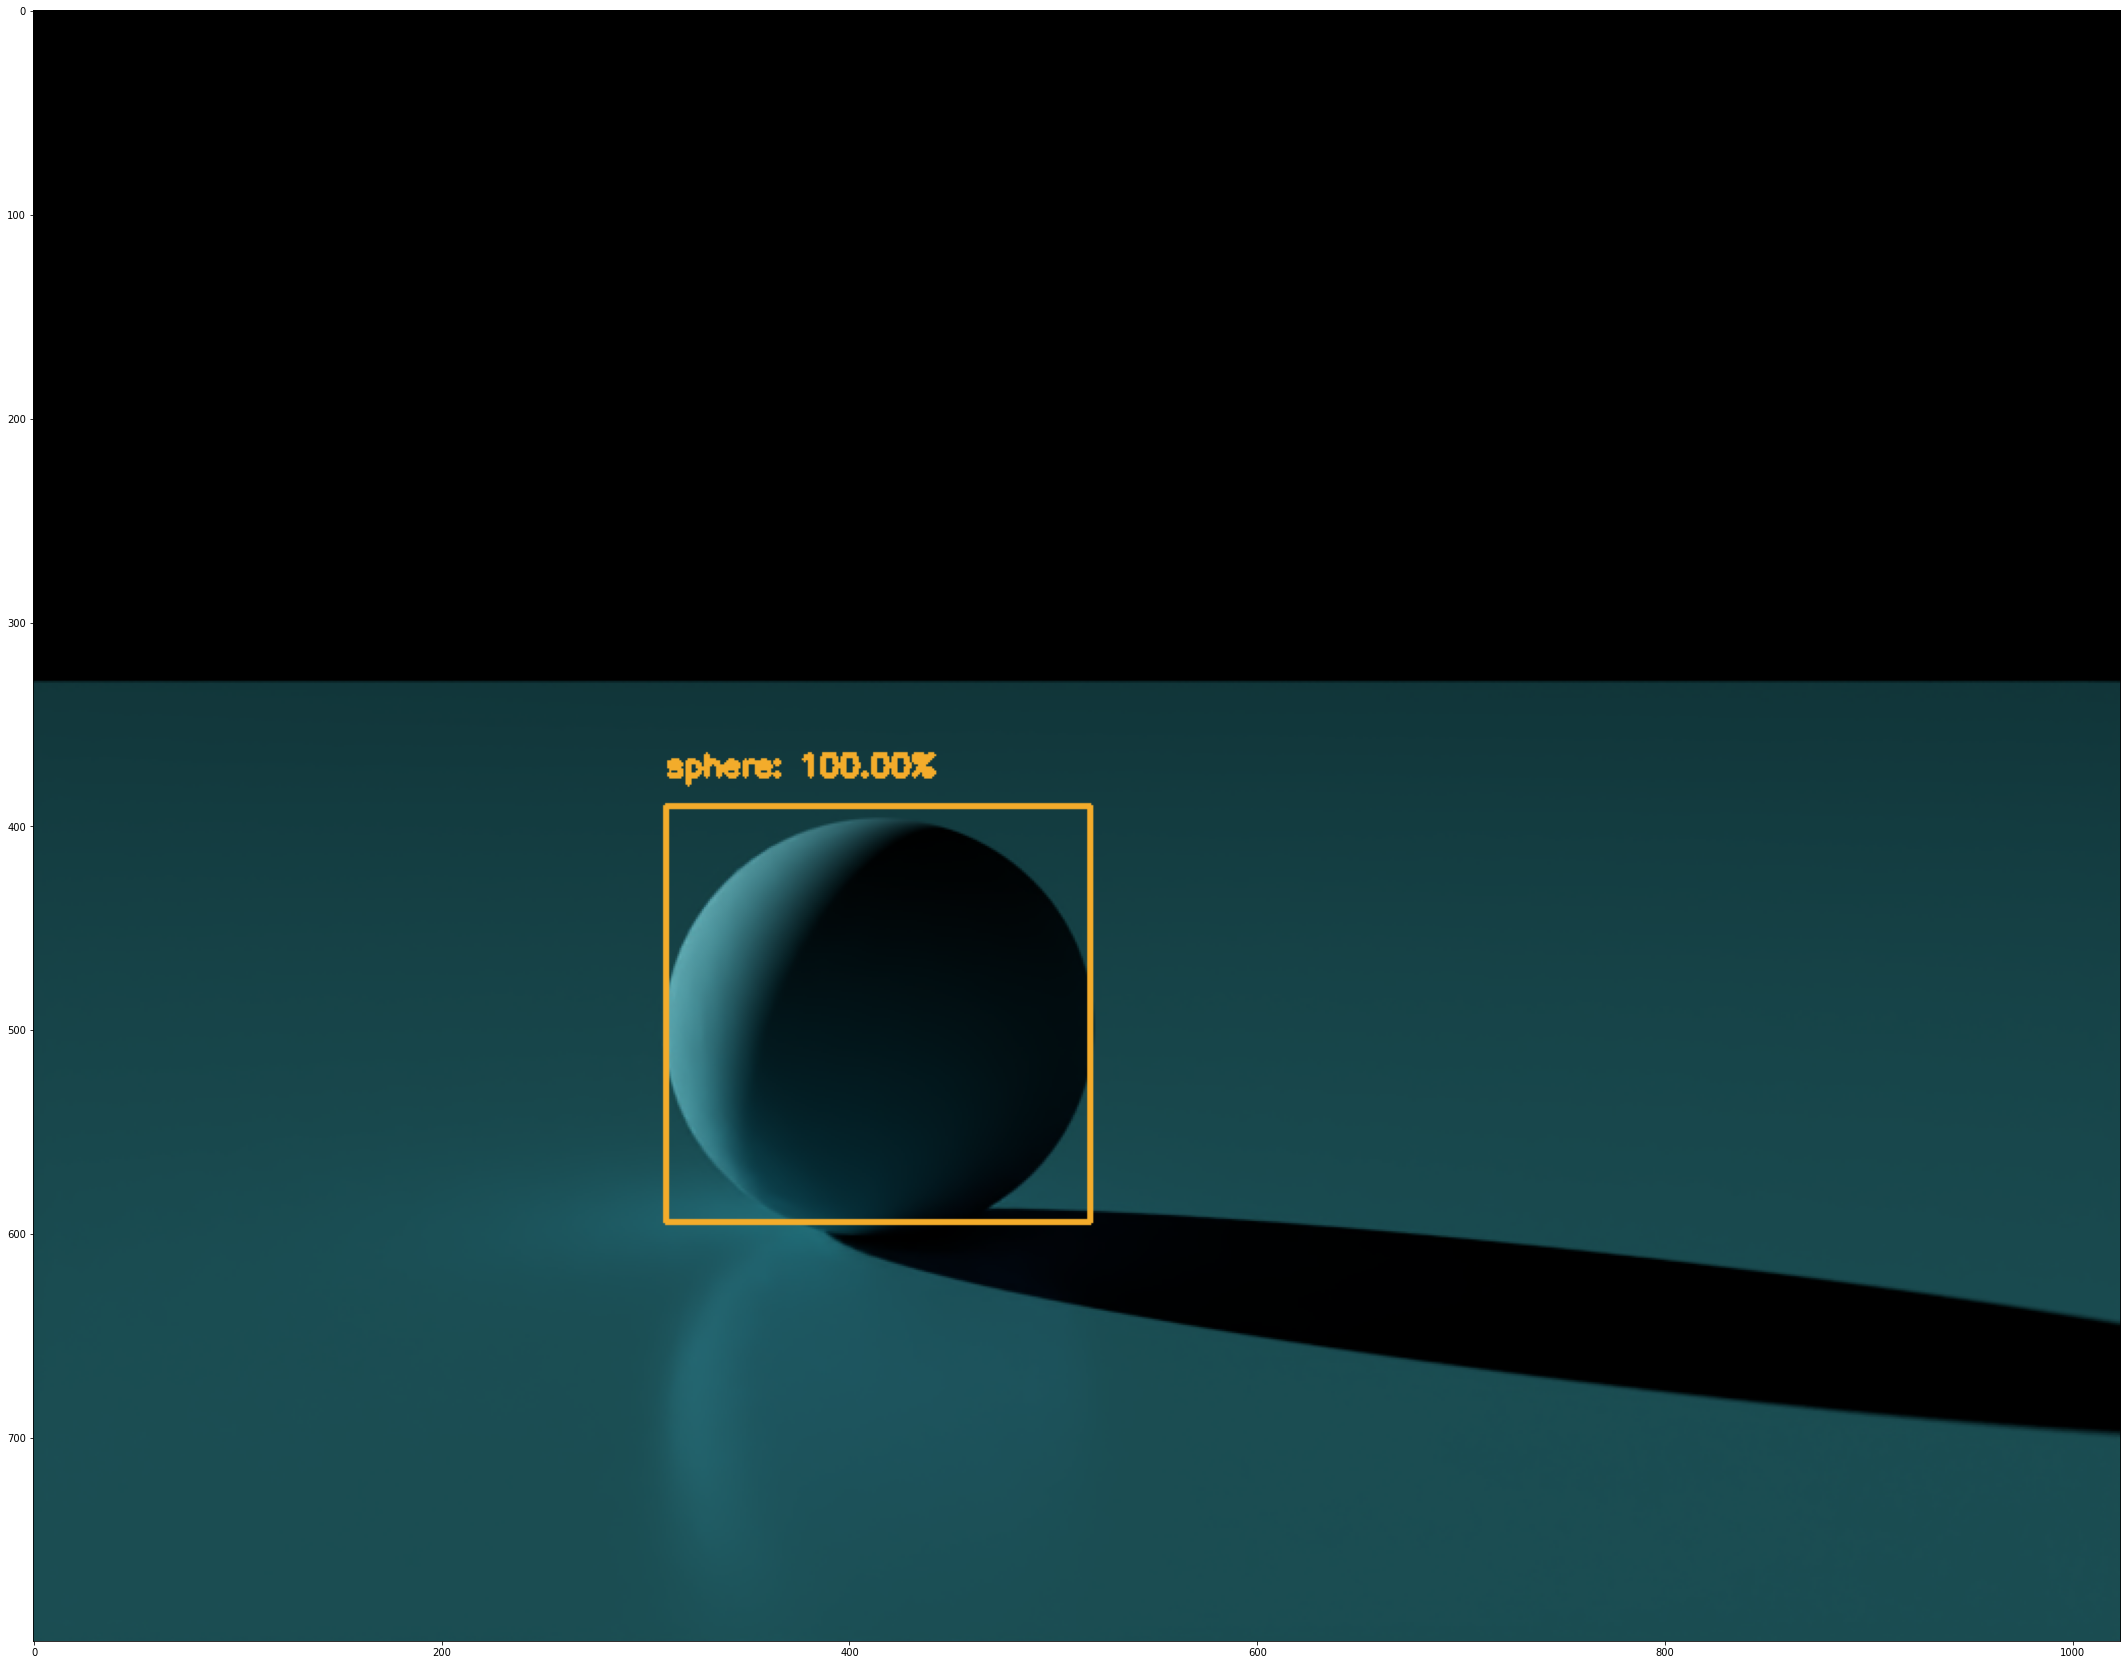

Image input size: 800, 1024
Id: 1
sphere: 99.99%


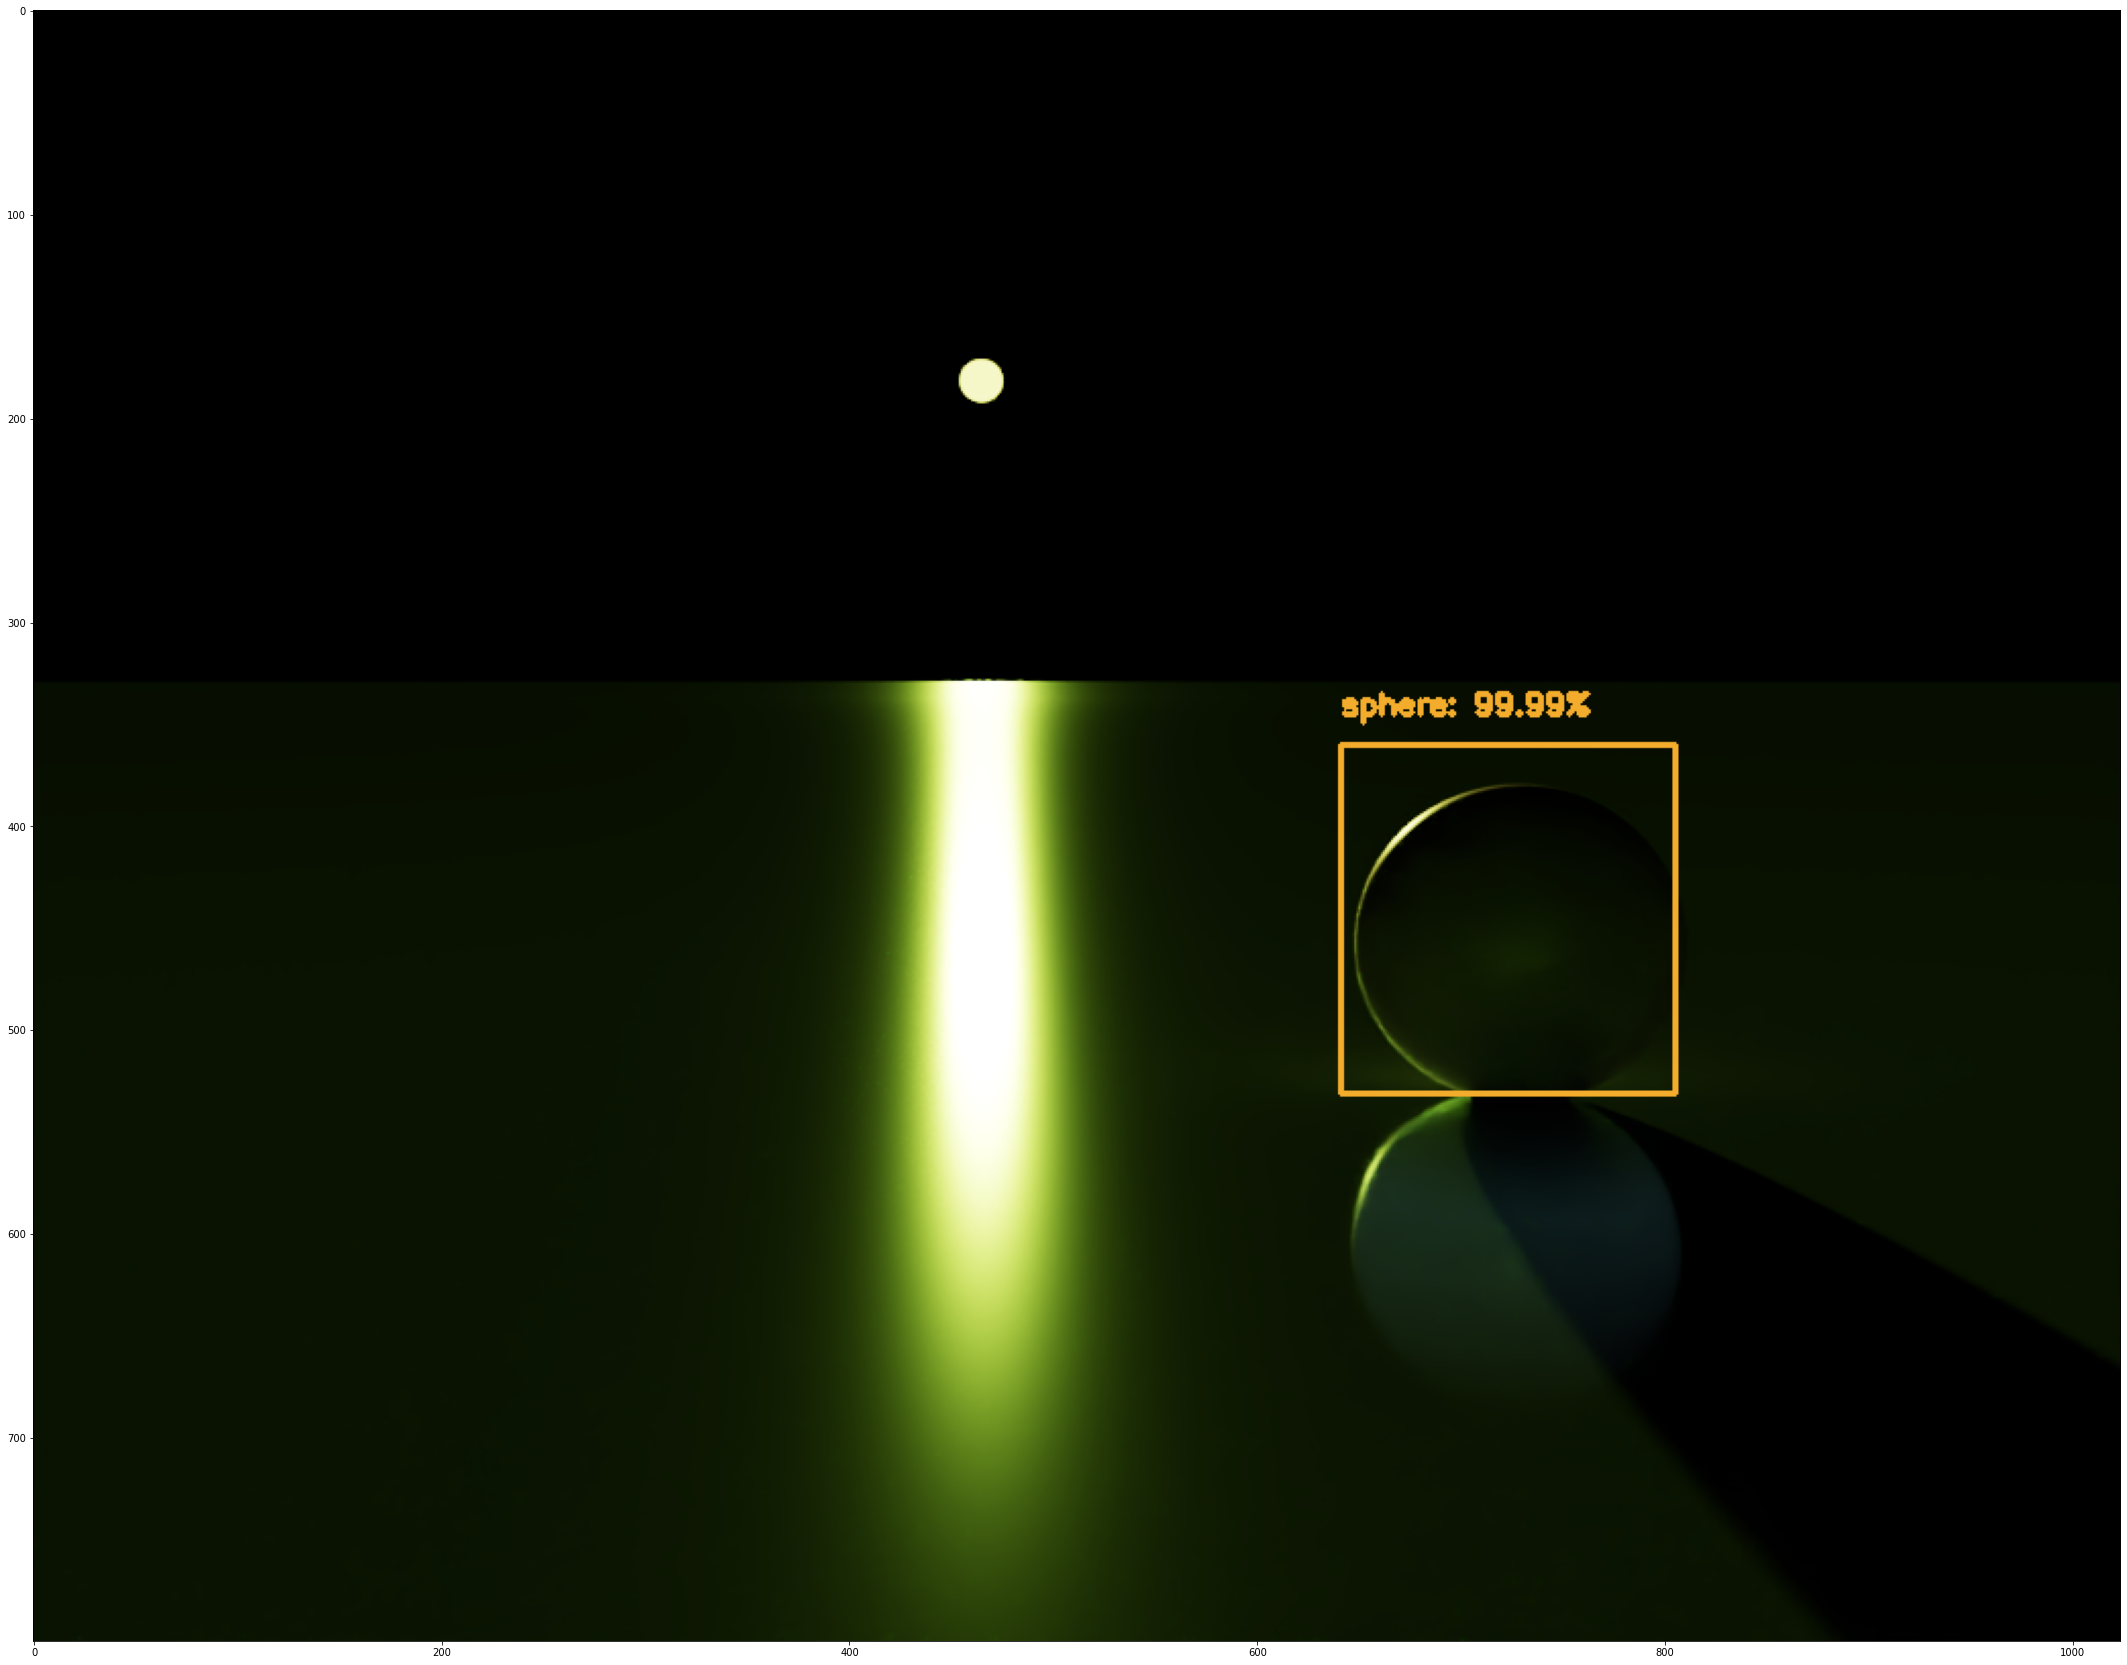

Image input size: 800, 1024
Id: 1
sphere: 92.22%


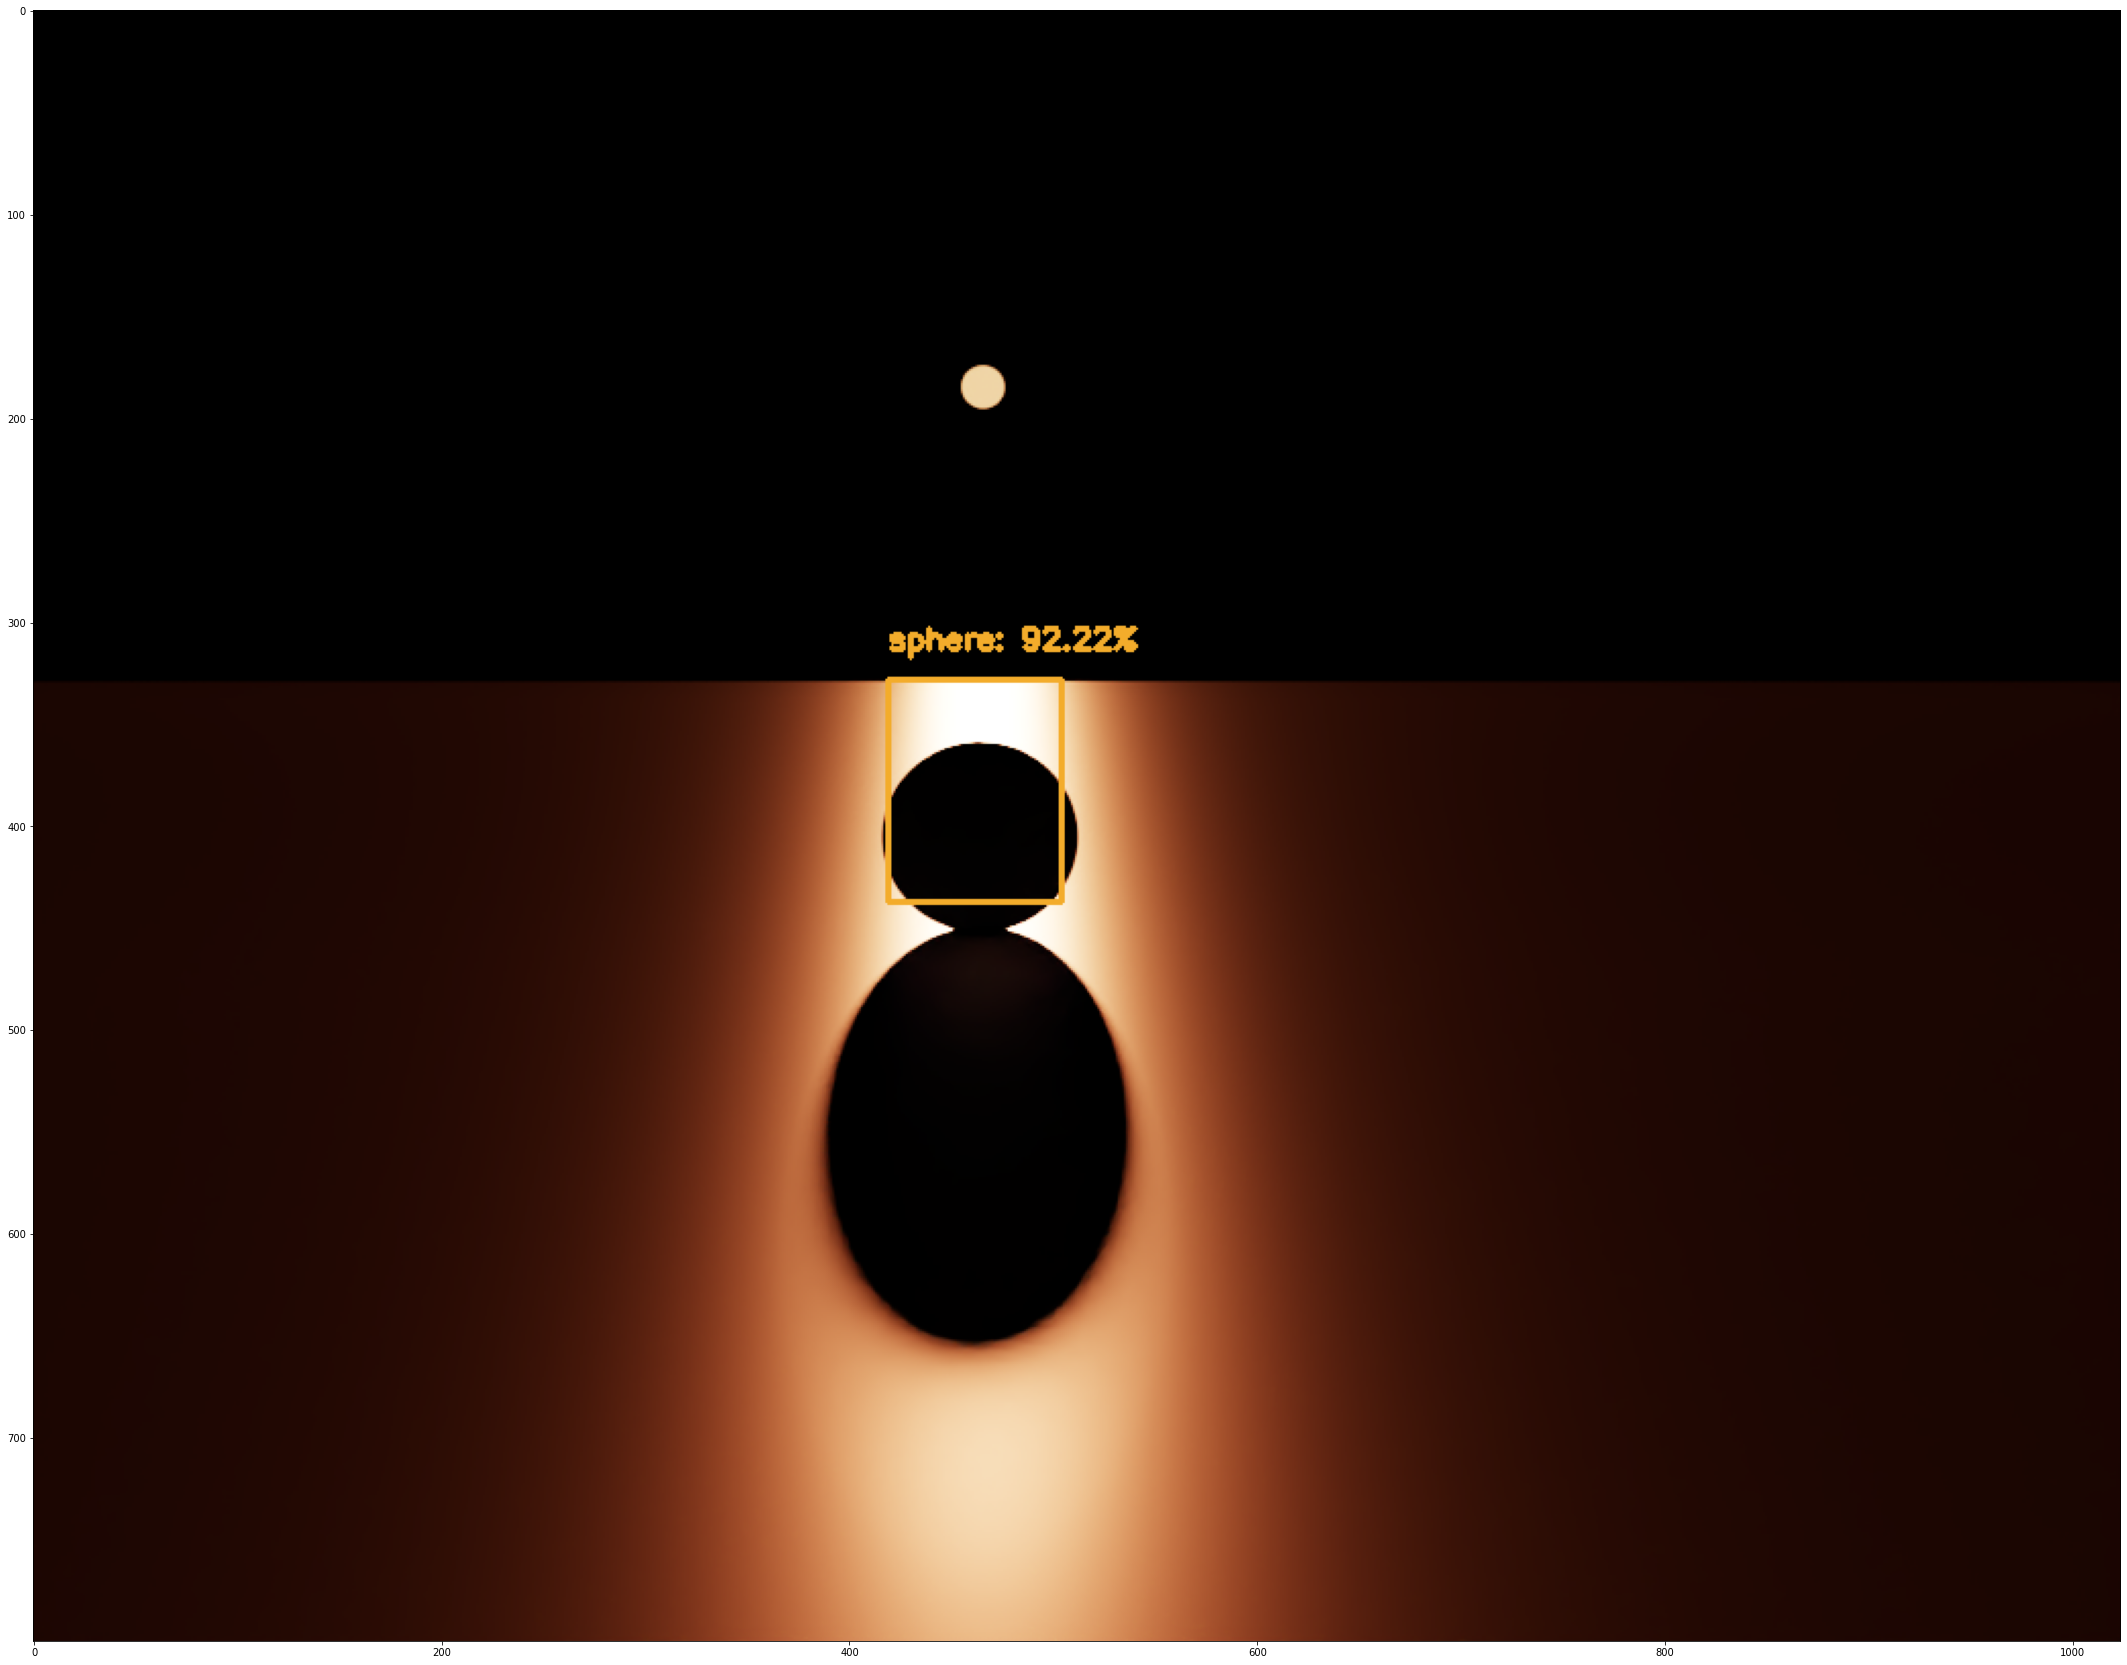

Image input size: 800, 1024
Id: 1
sphere: 99.49%


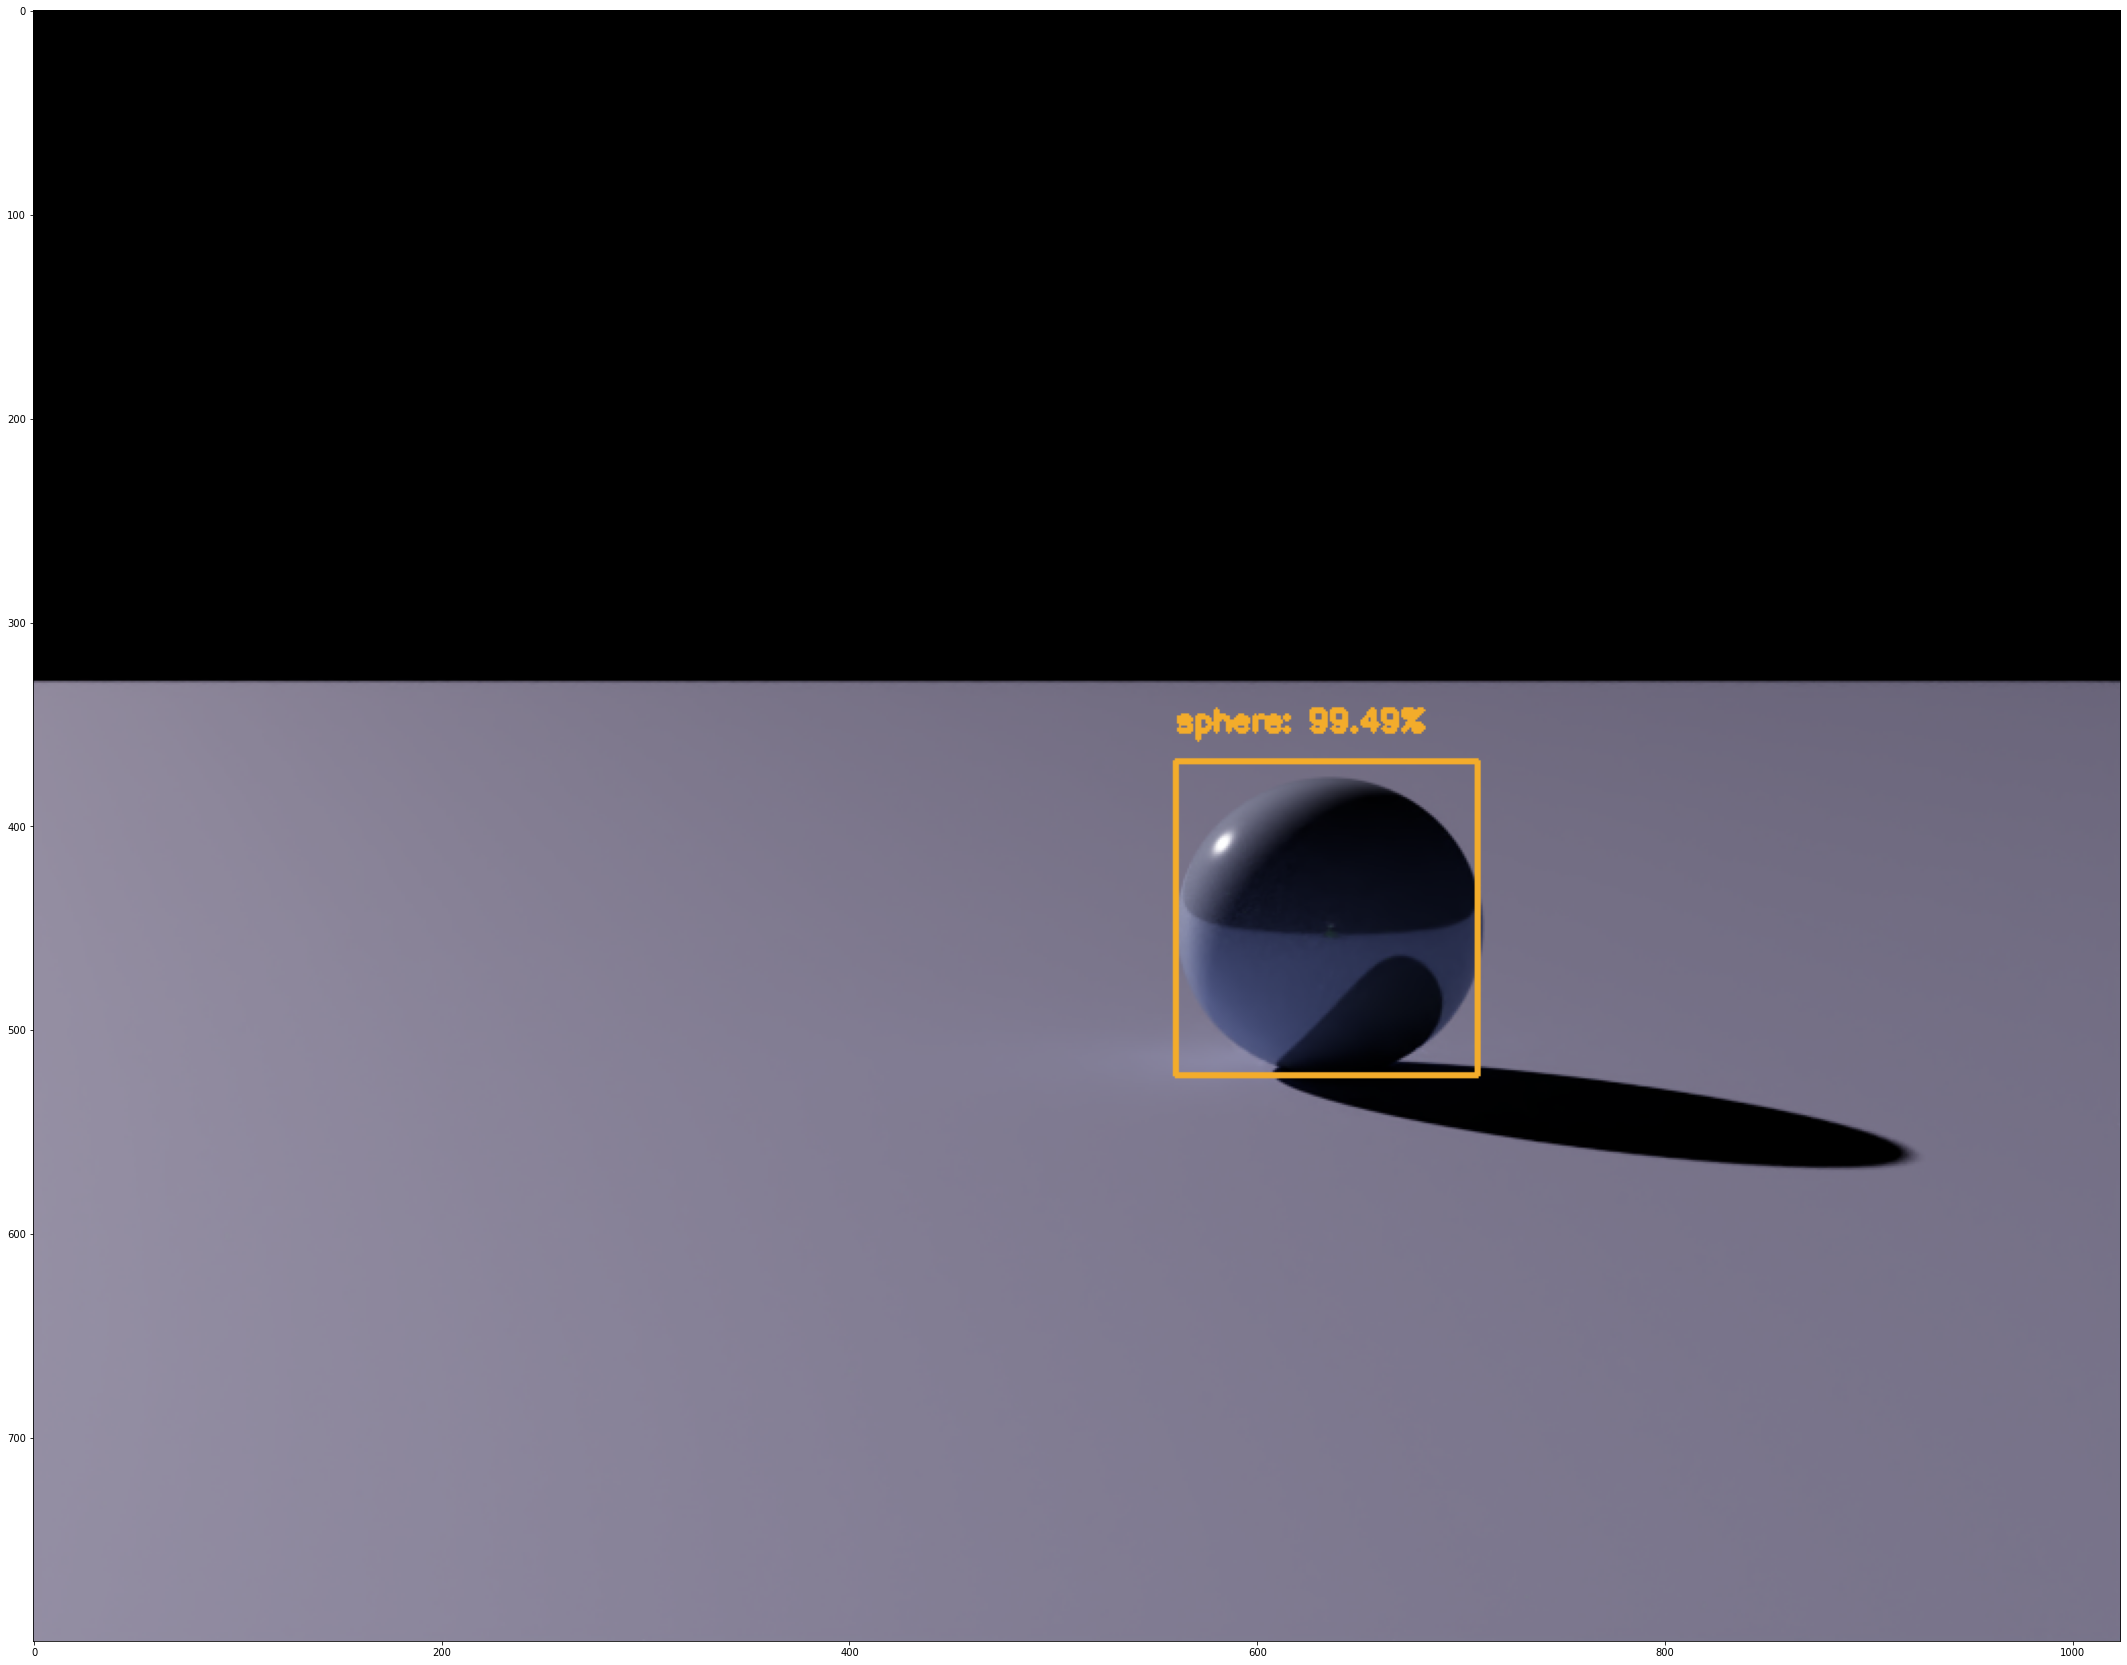

Image input size: 800, 1024
Image input size: 800, 1024
Image input size: 800, 1024
Image input size: 800, 1024
Id: 1
sphere: 99.99%


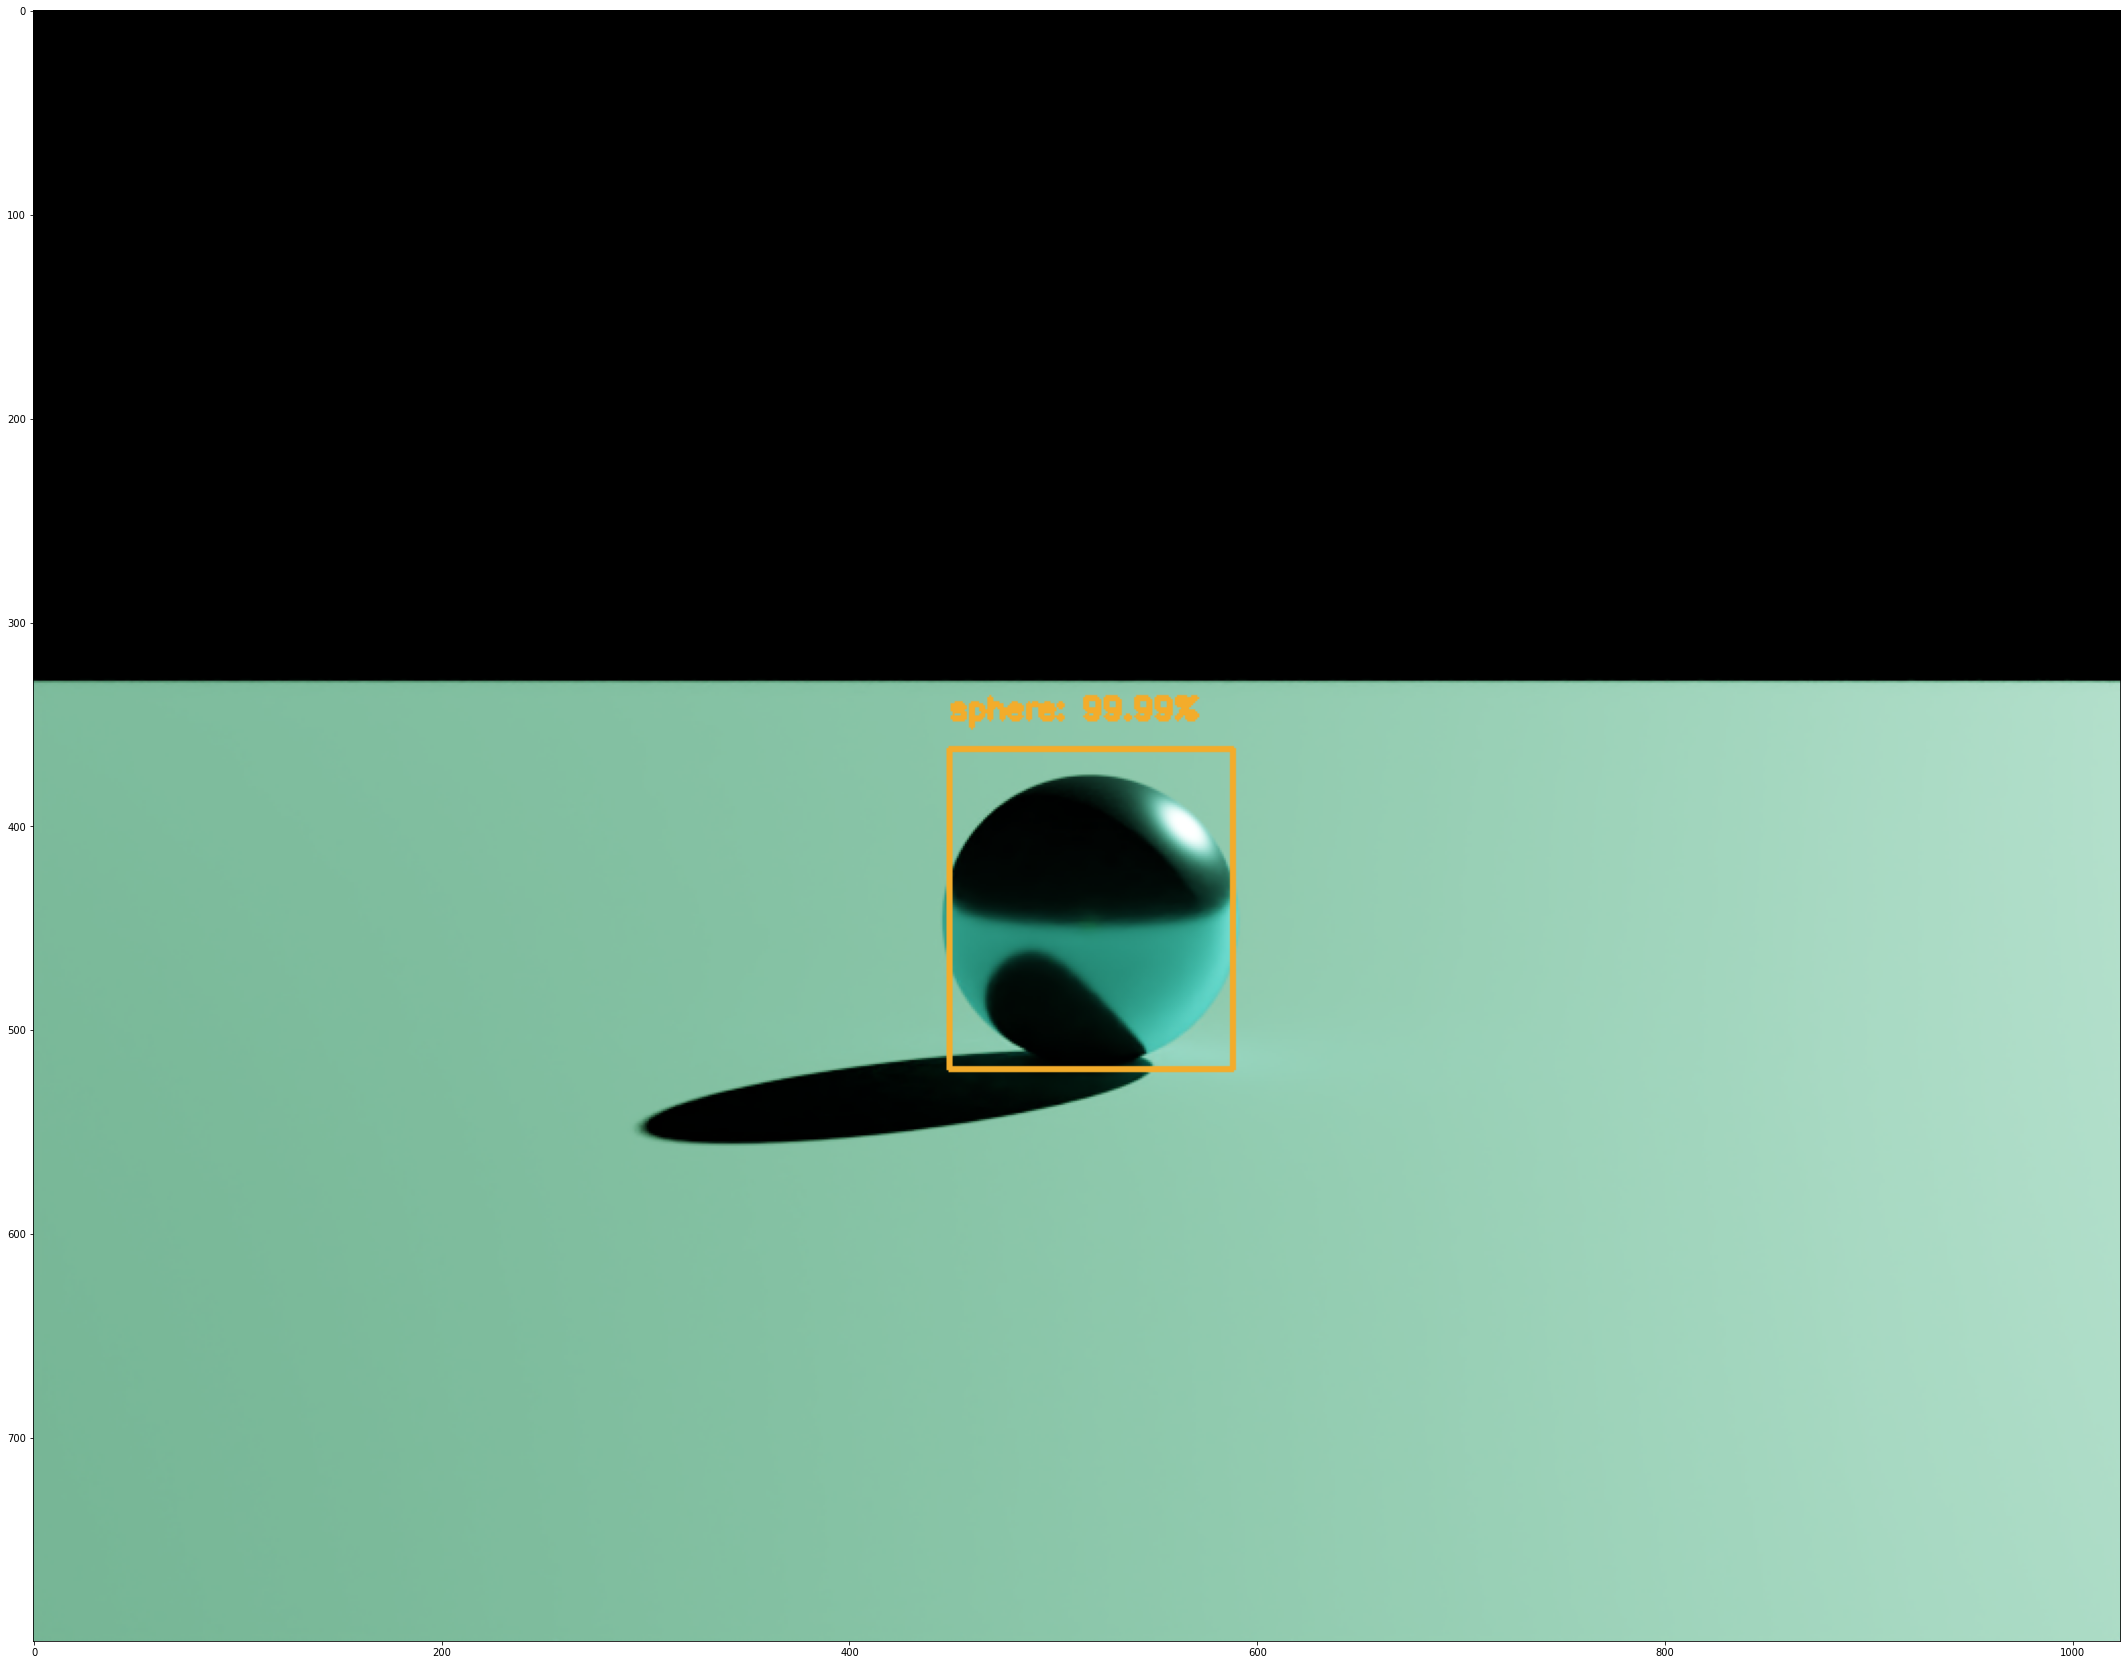

Image input size: 800, 1024
Id: 1
sphere: 90.76%


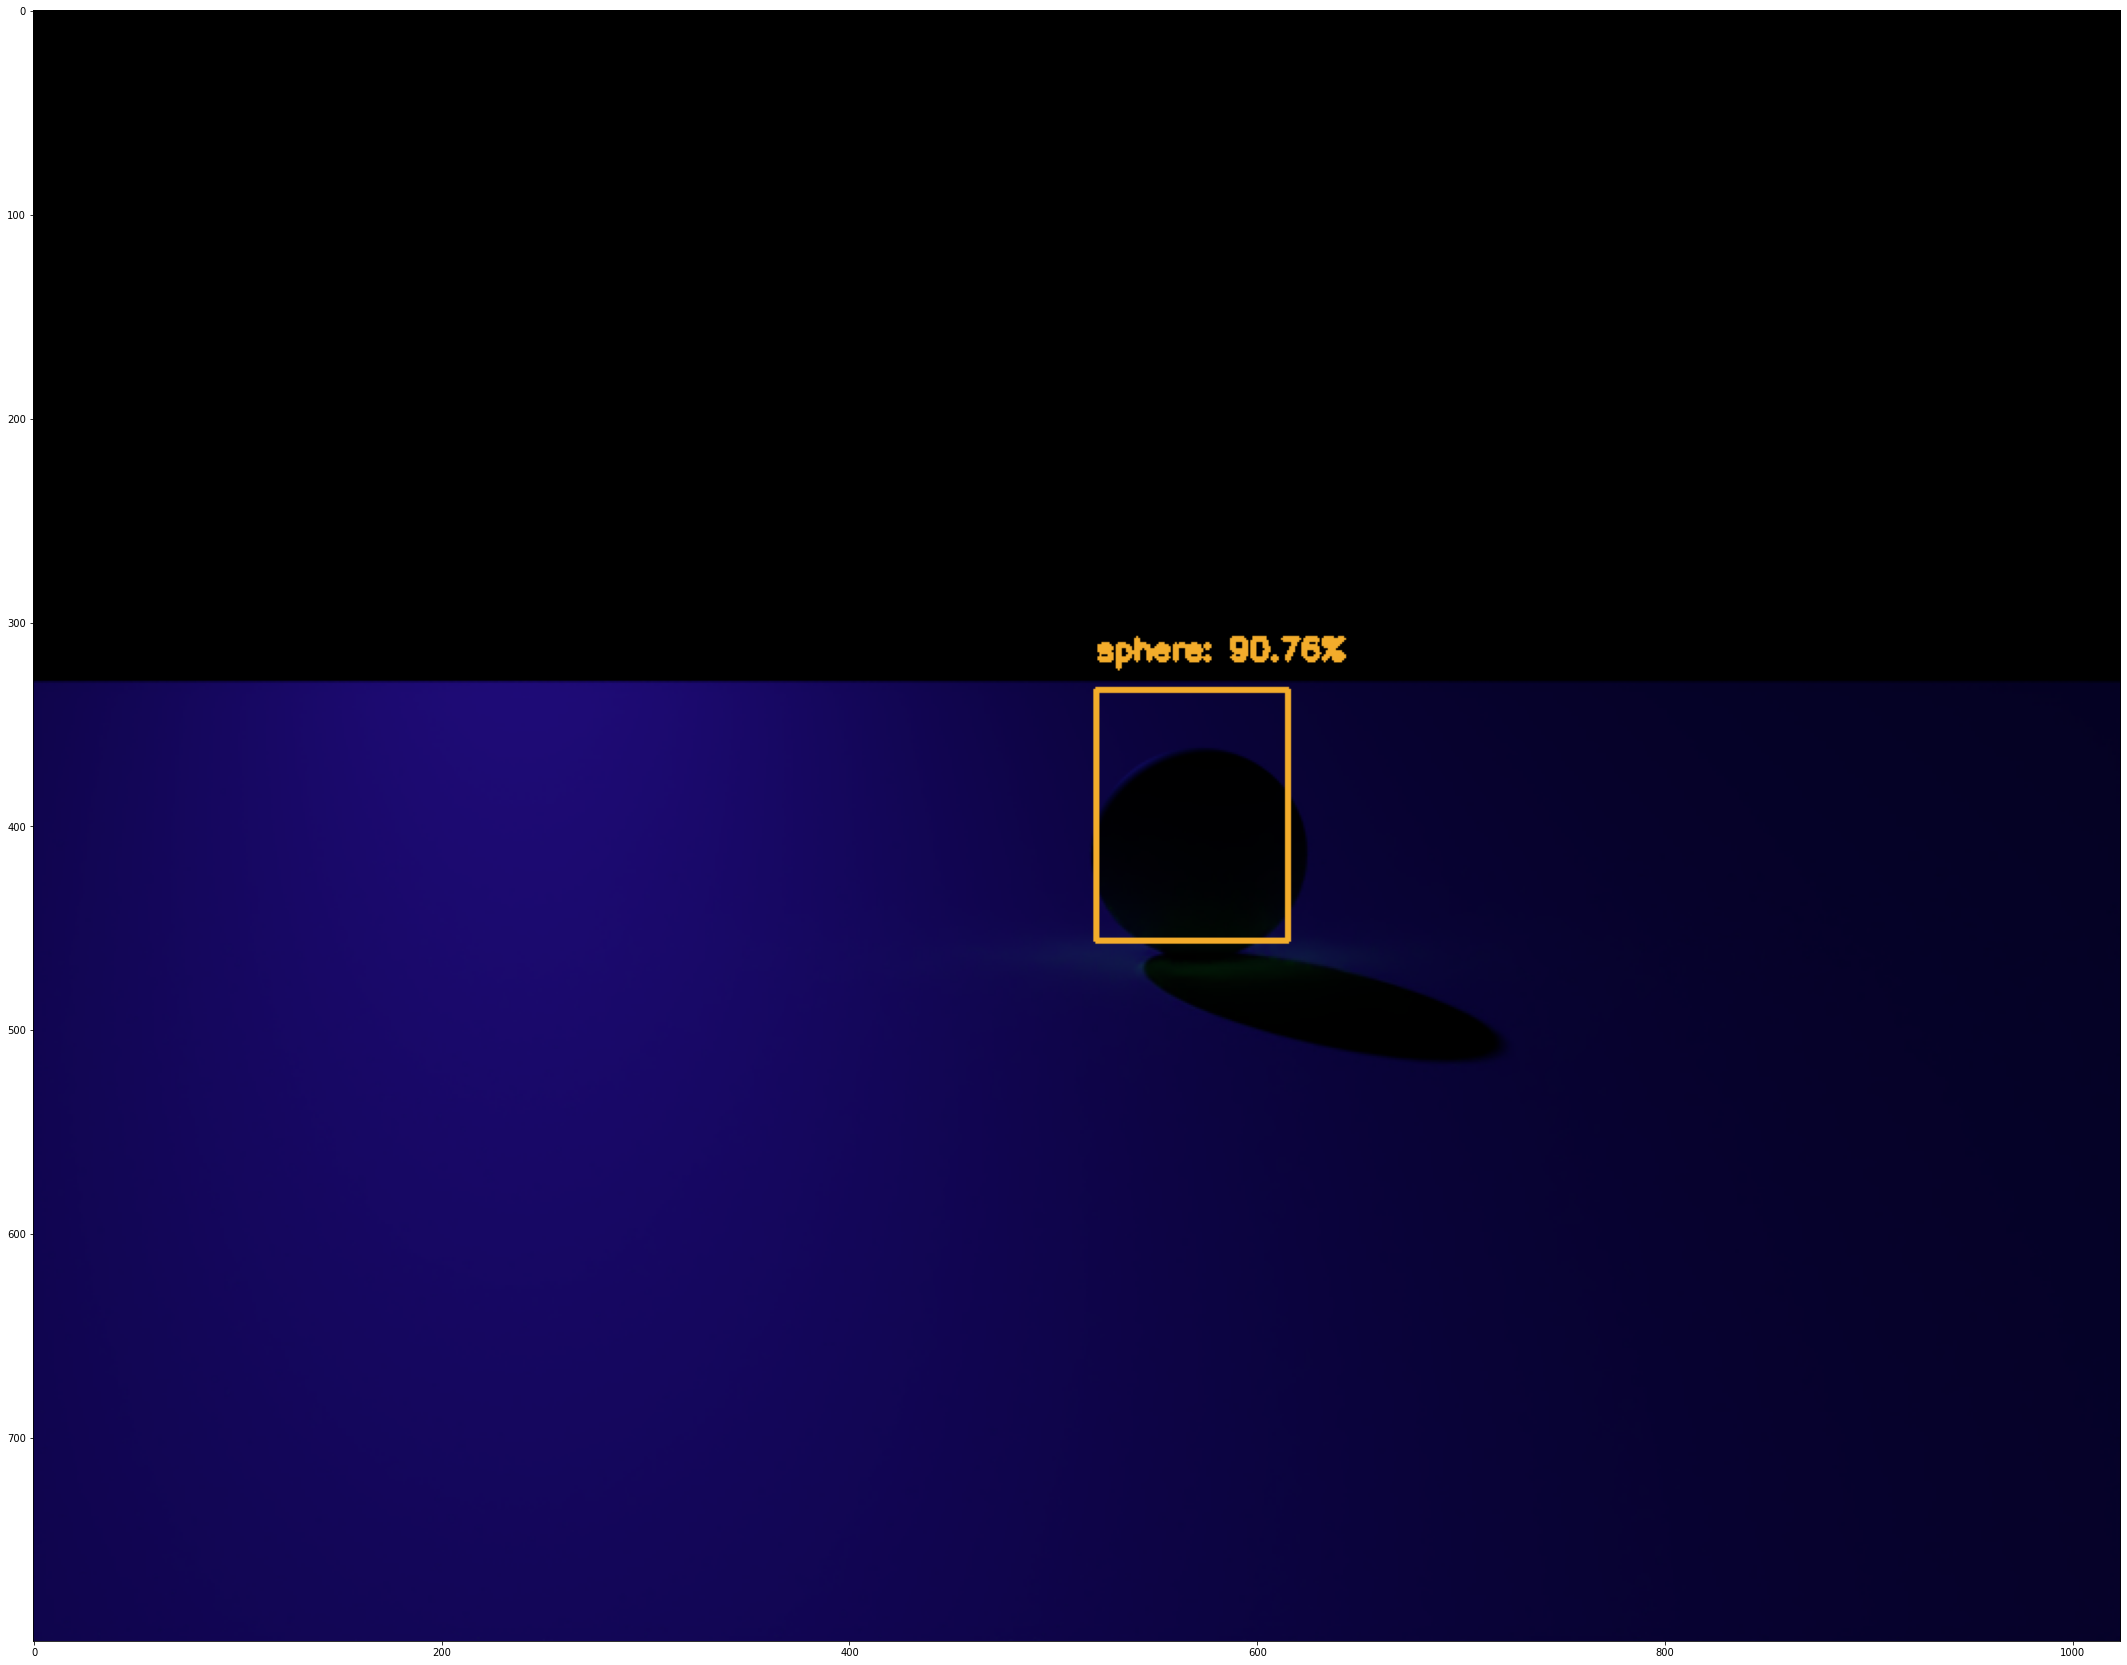

Image input size: 800, 1024
Id: 1
sphere: 97.16%


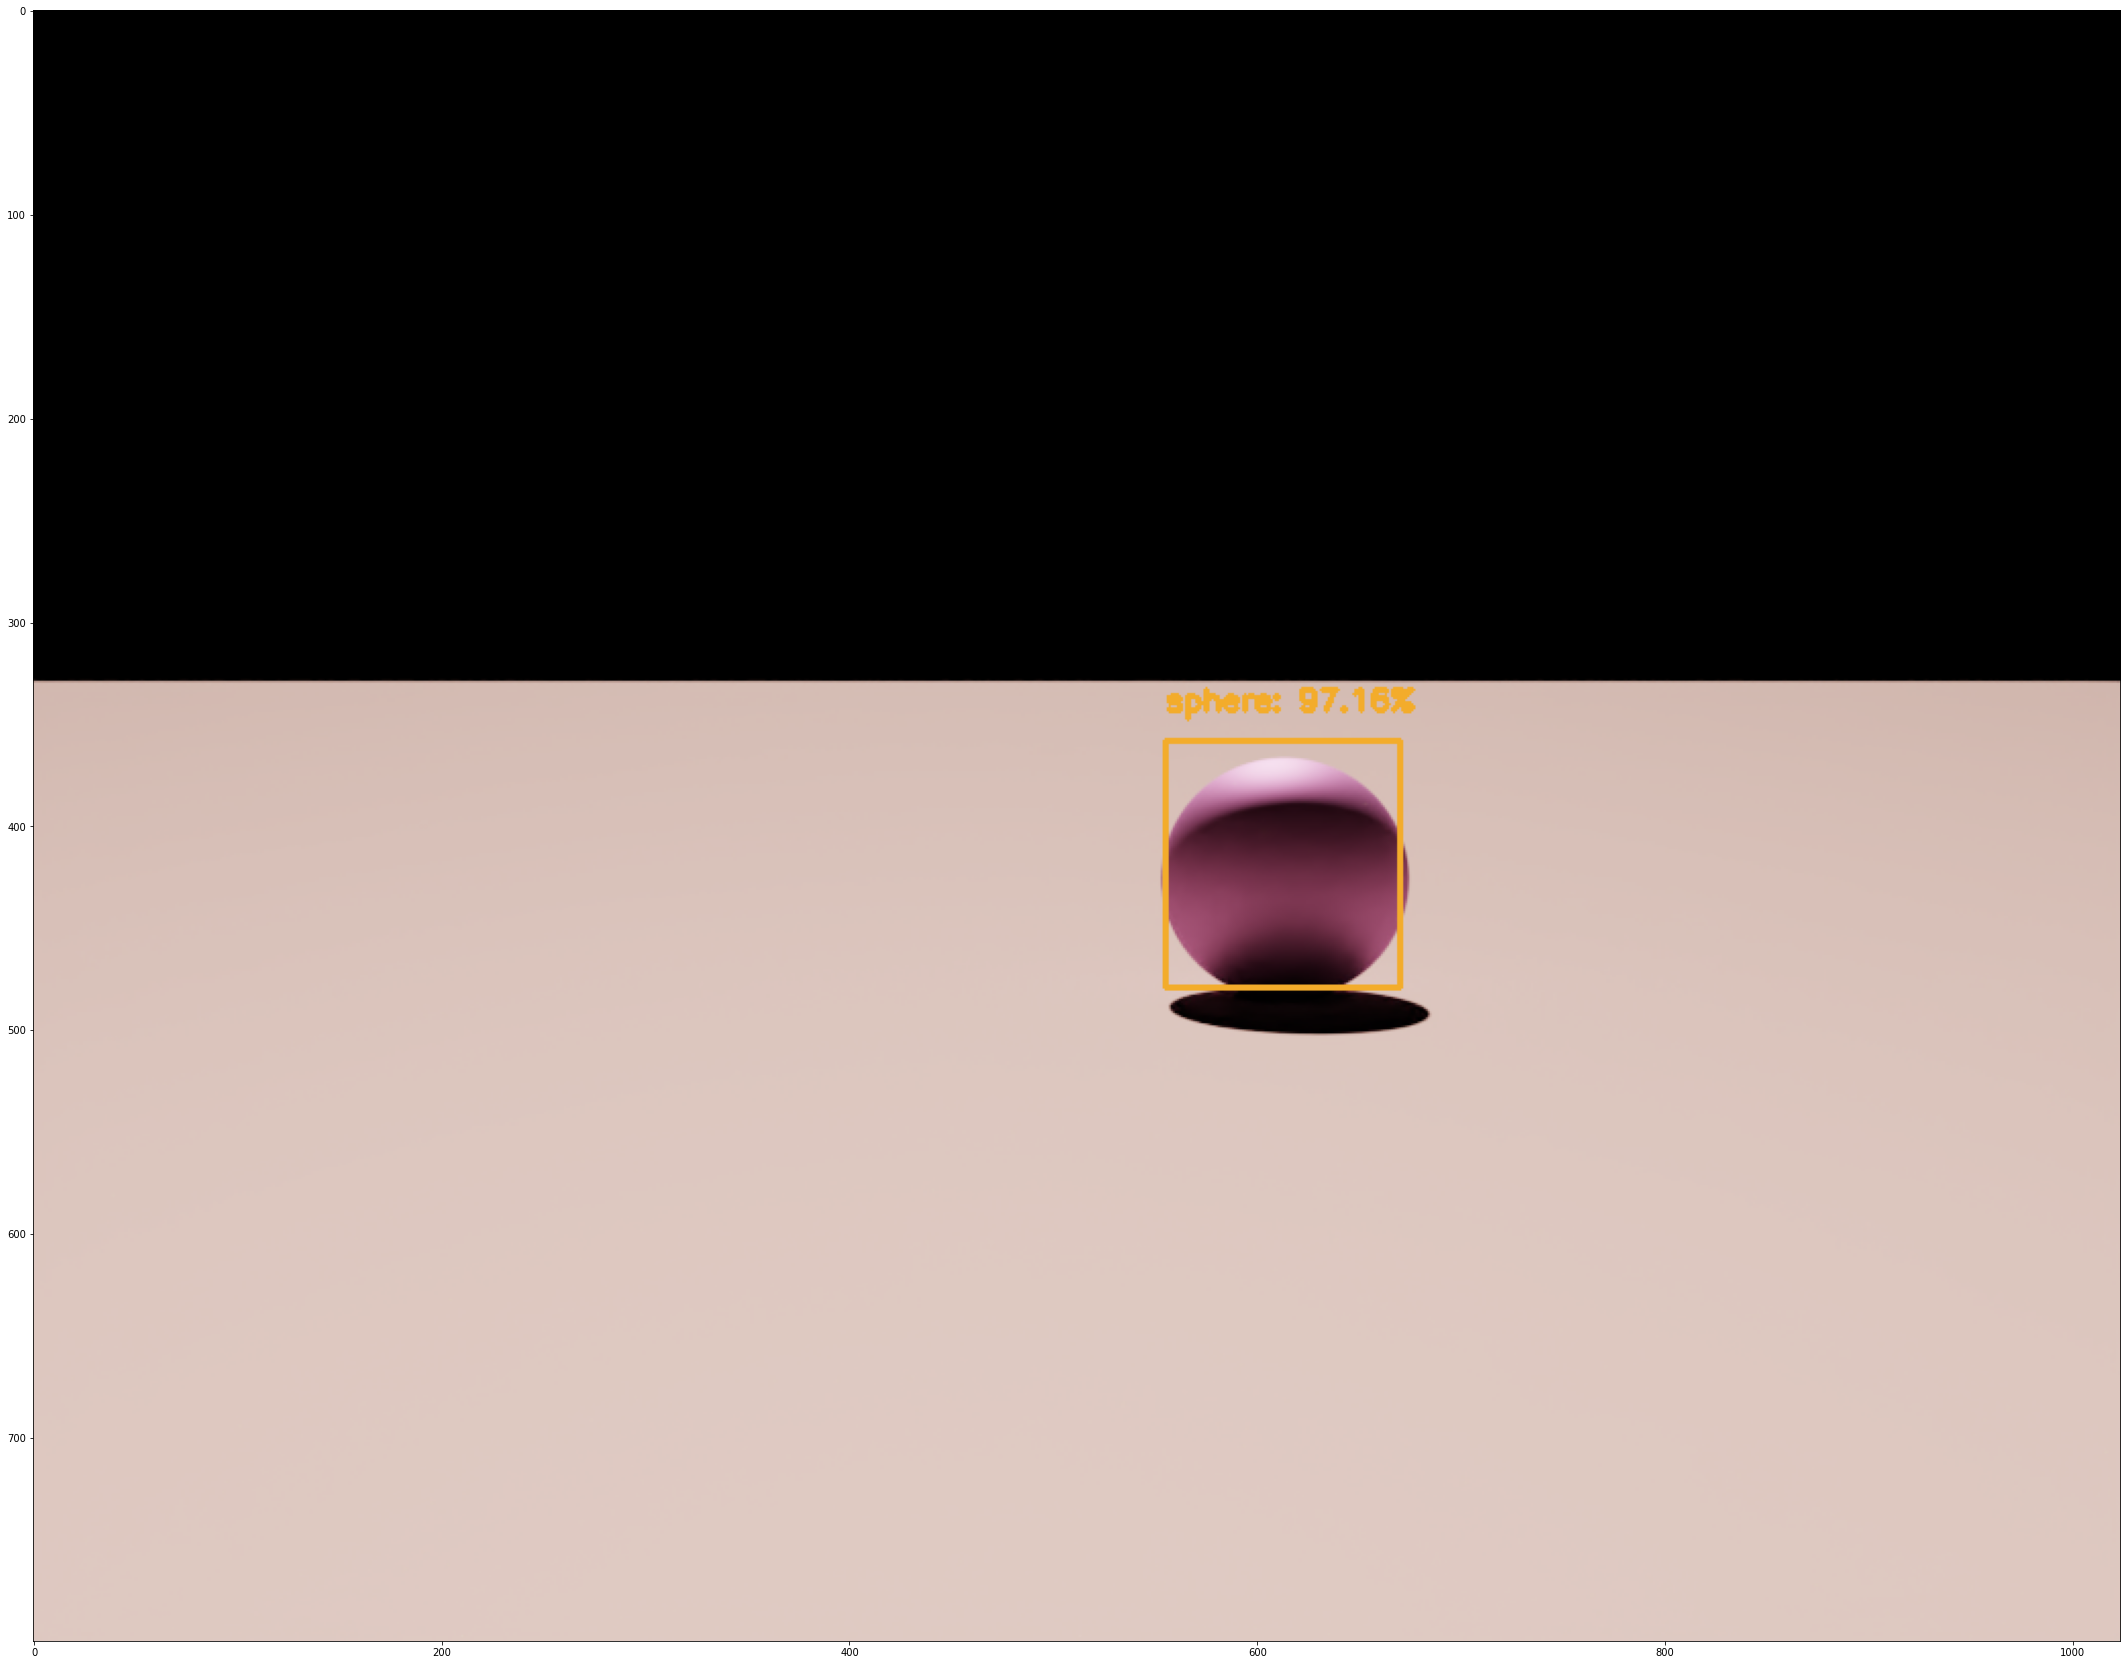

Image input size: 800, 1024
Id: 1
sphere: 99.92%


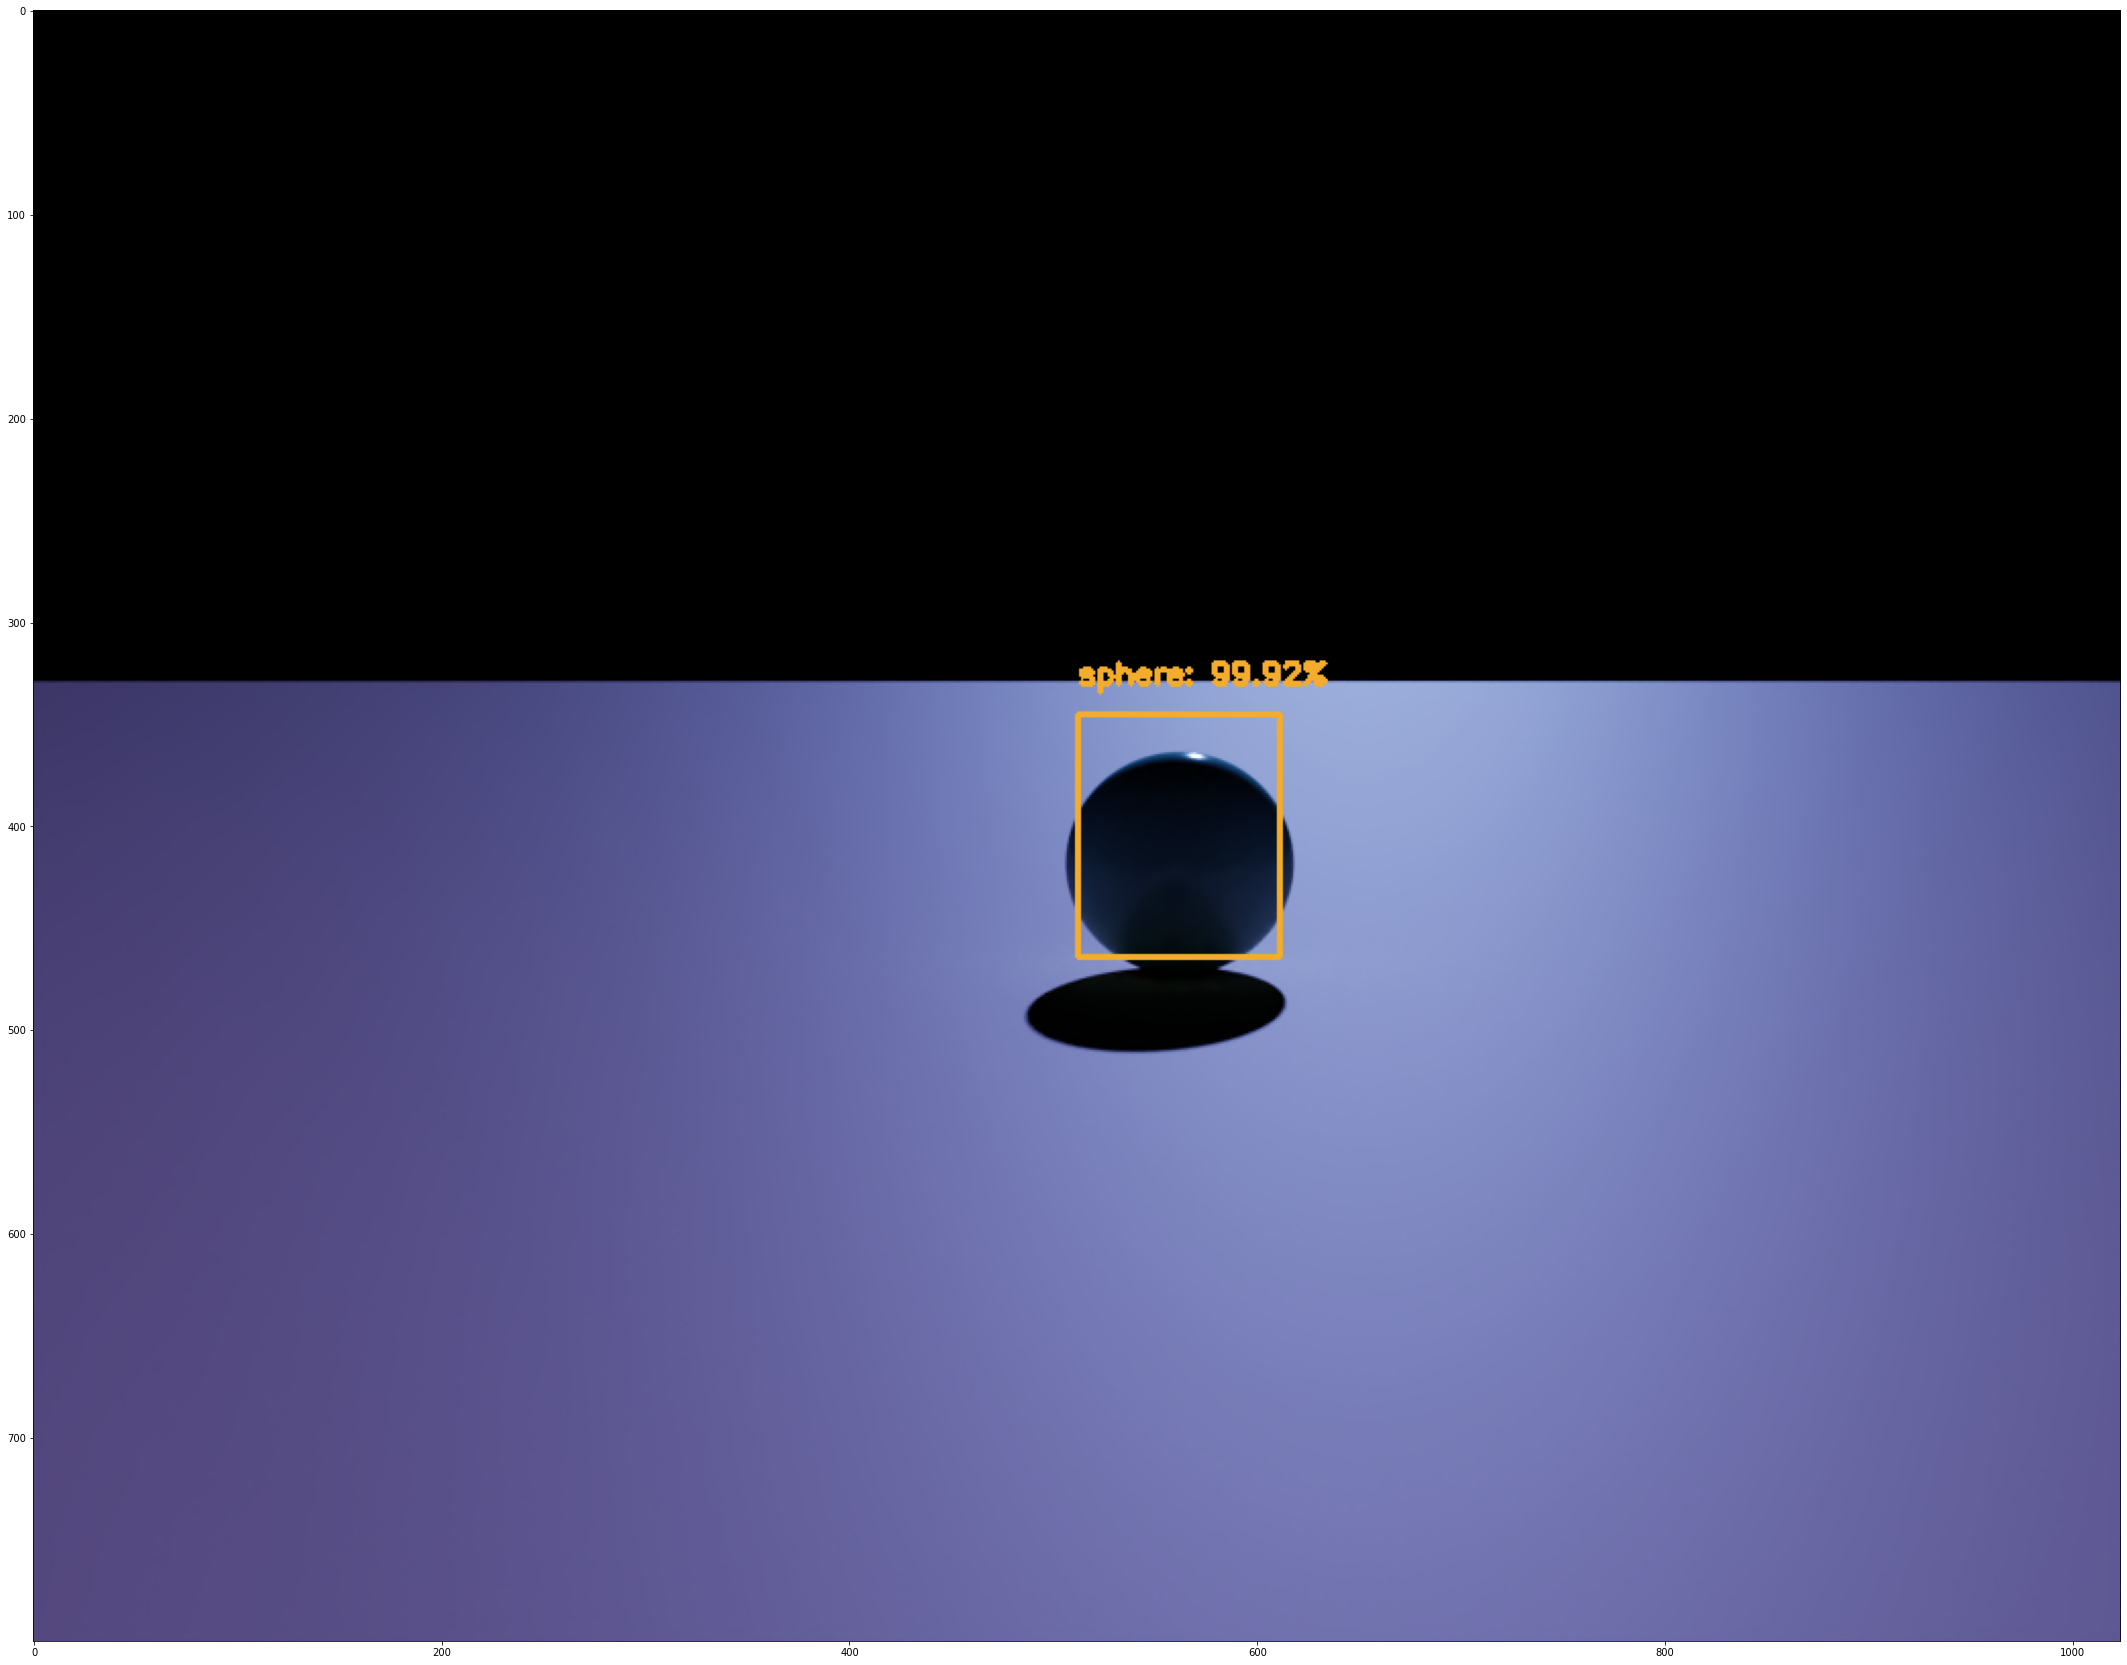

Image input size: 800, 1024
Image input size: 800, 1024
Image input size: 800, 1024
Id: 1
sphere: 100.00%


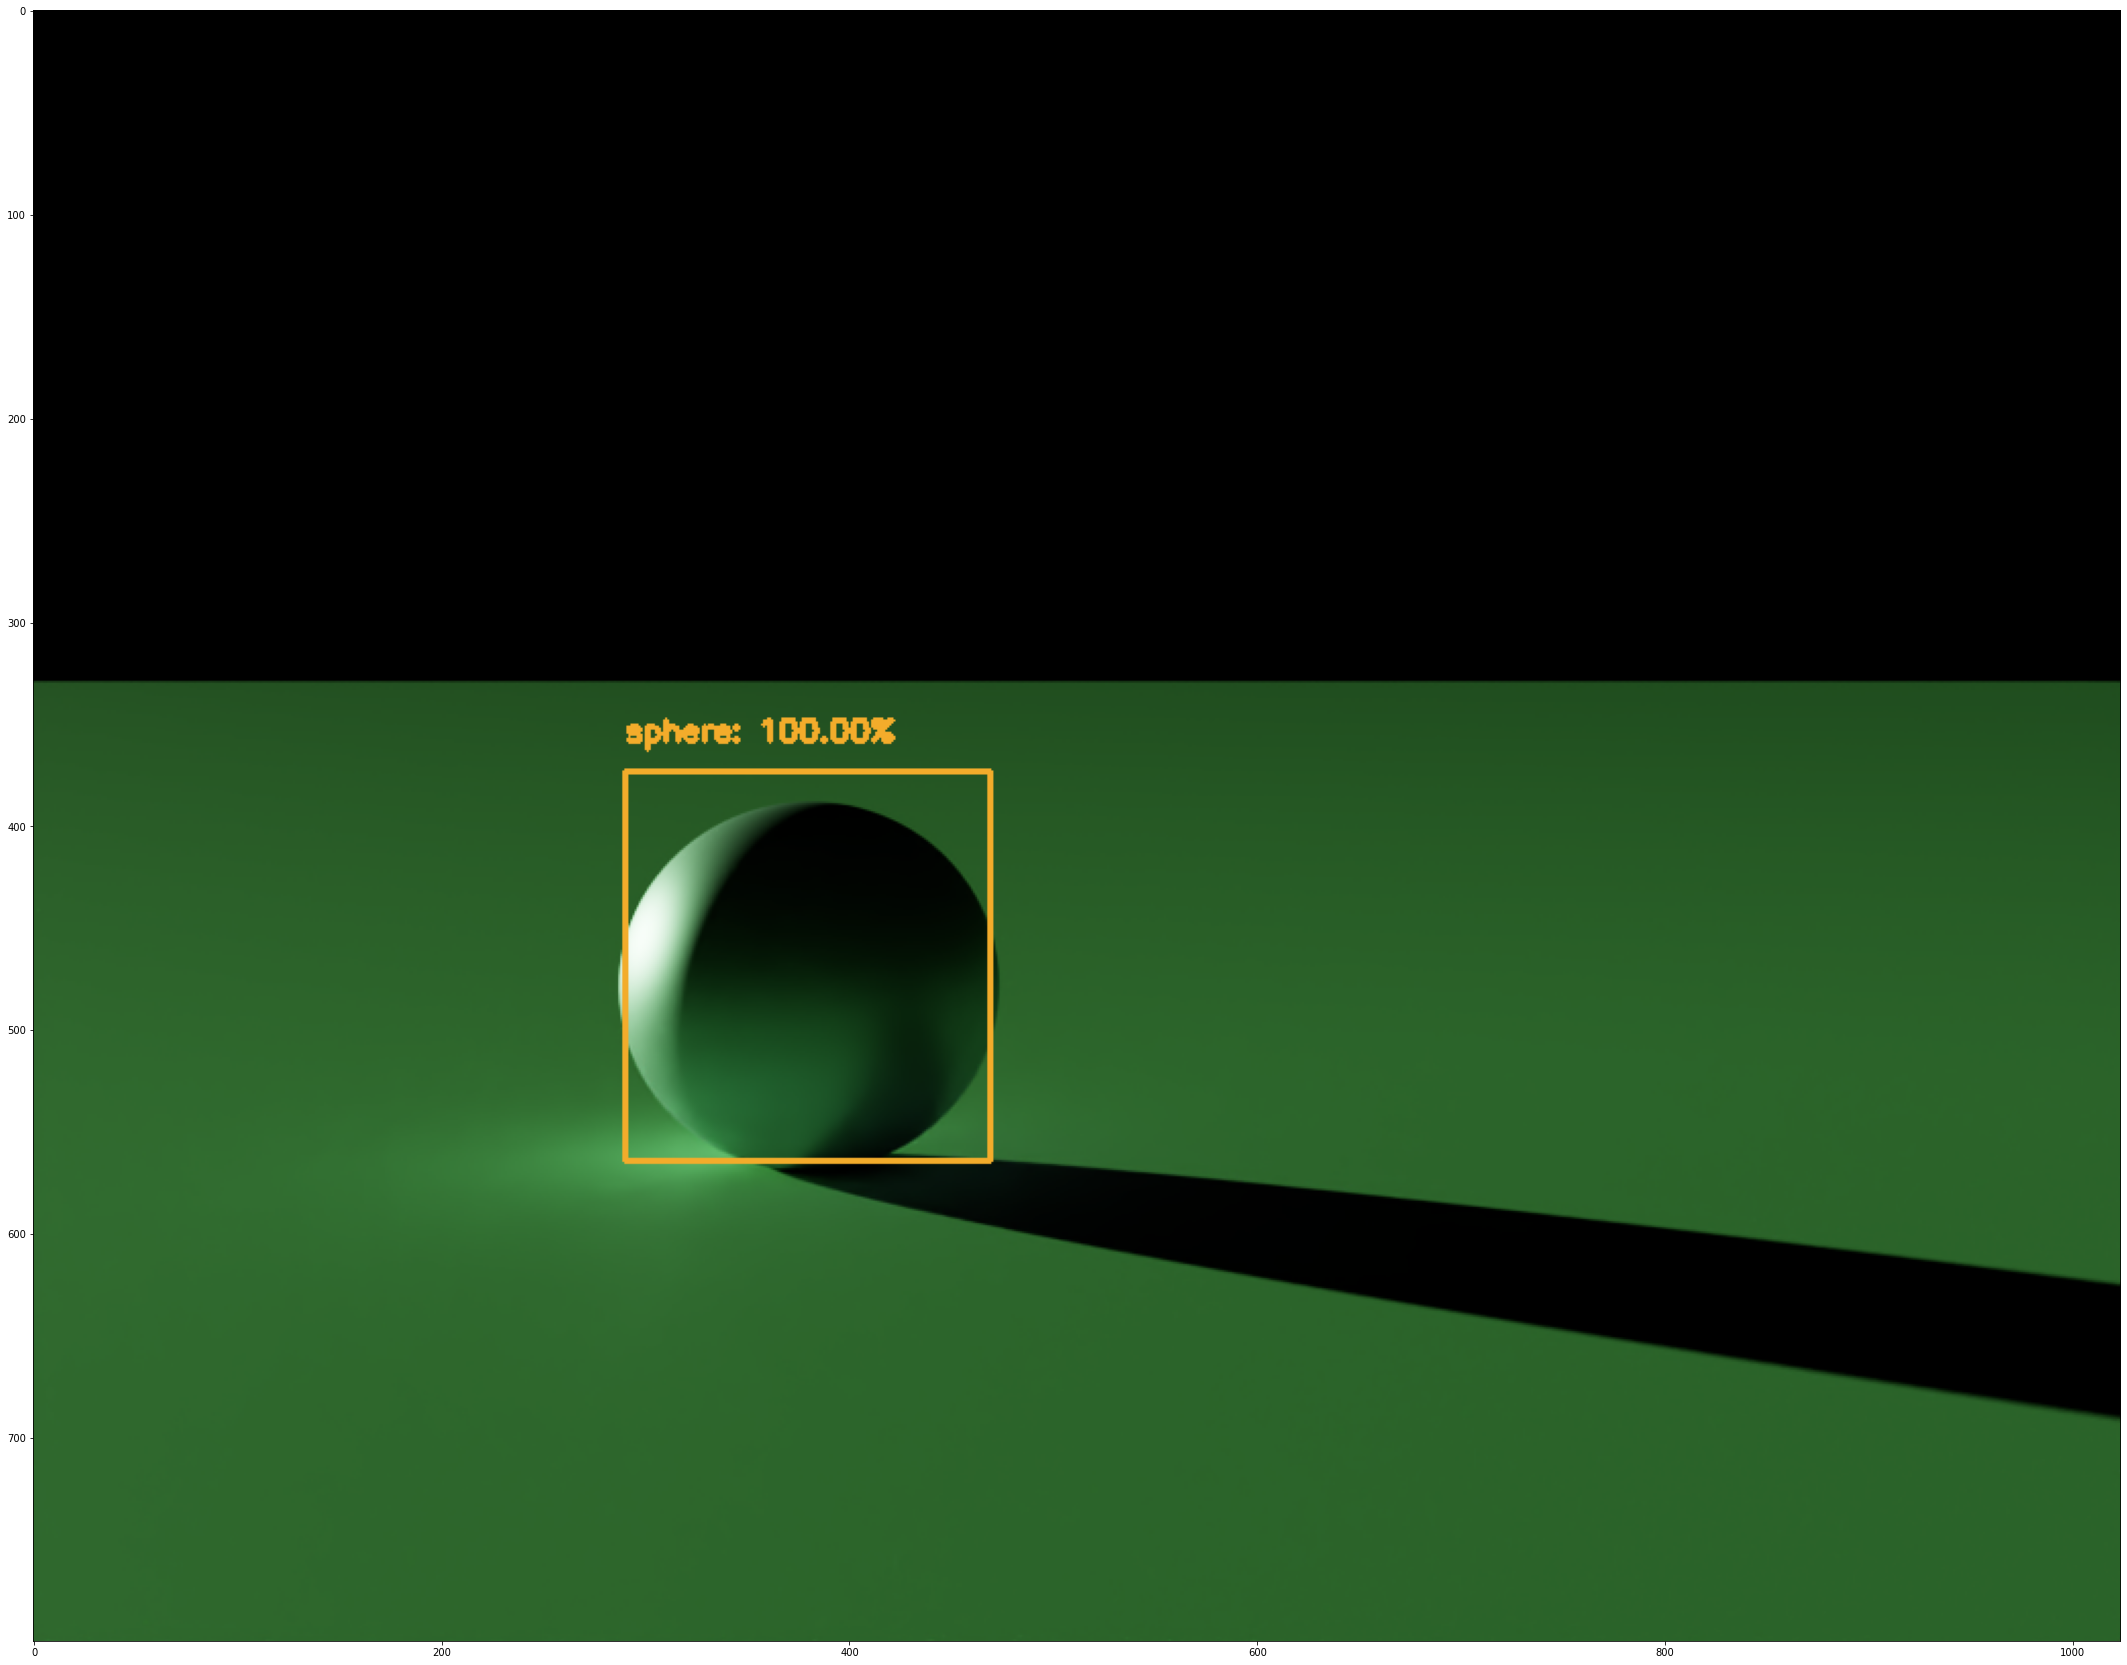

Image input size: 800, 1024
Id: 1
sphere: 99.75%


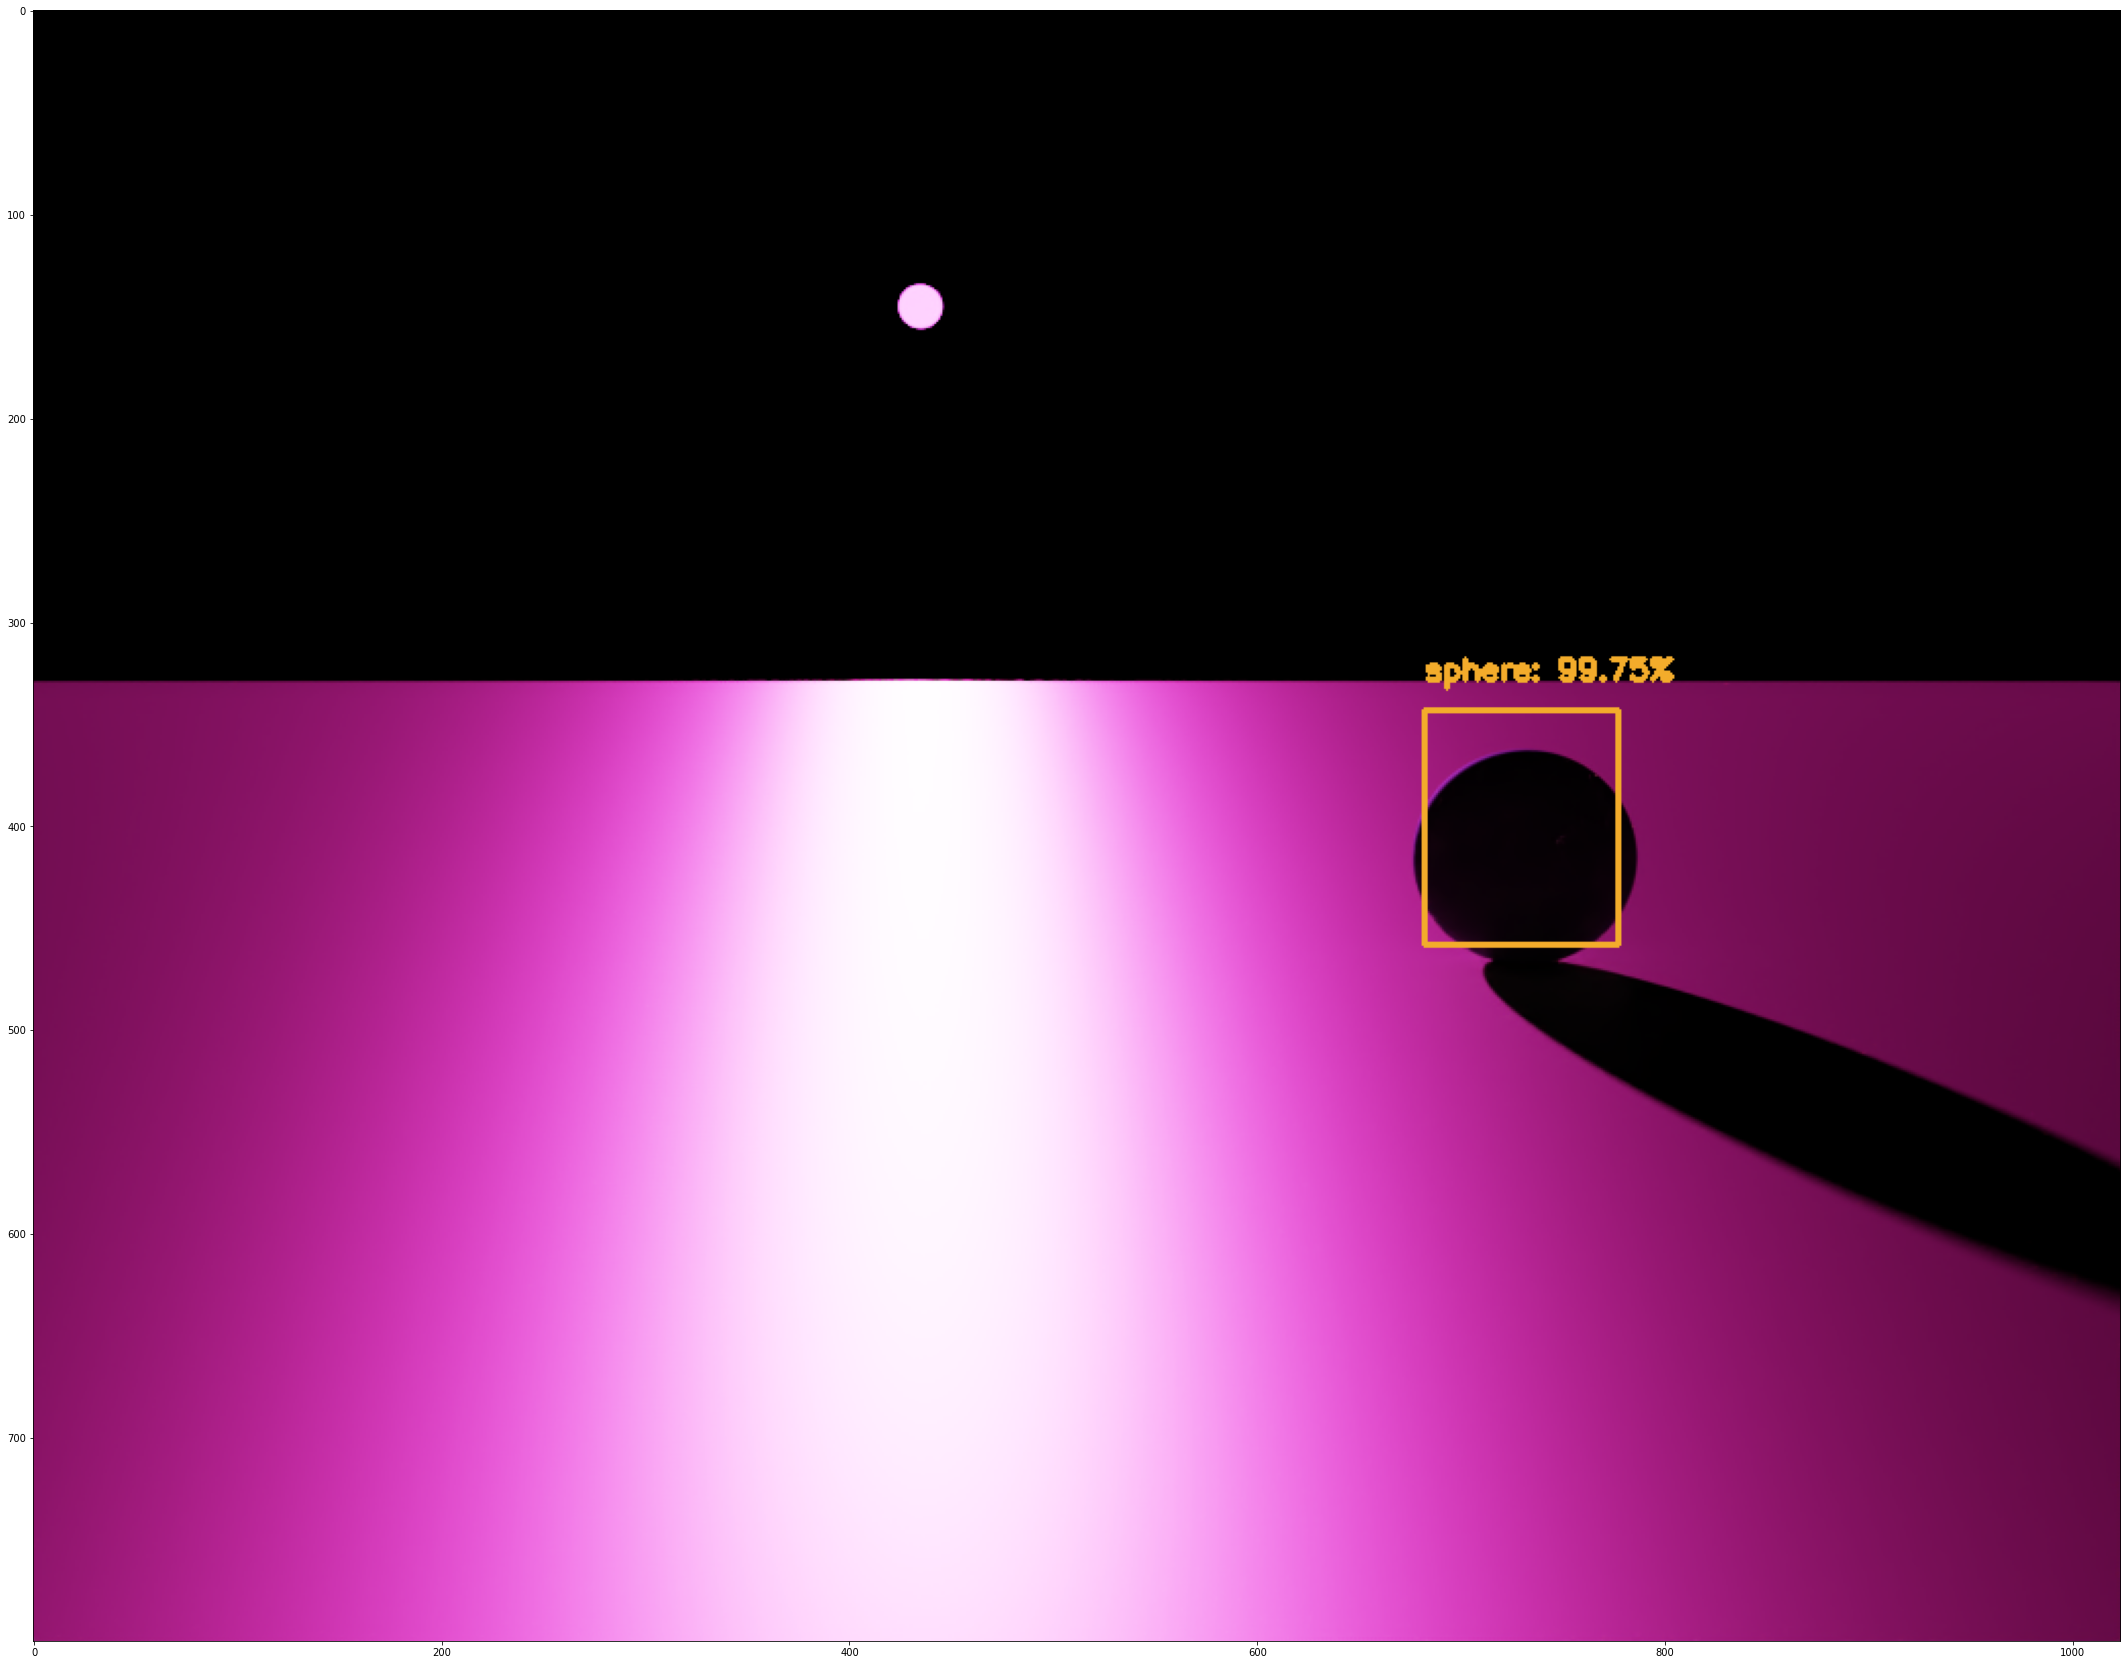

Image input size: 800, 1024
Image input size: 800, 1024
Id: 1
sphere: 100.00%


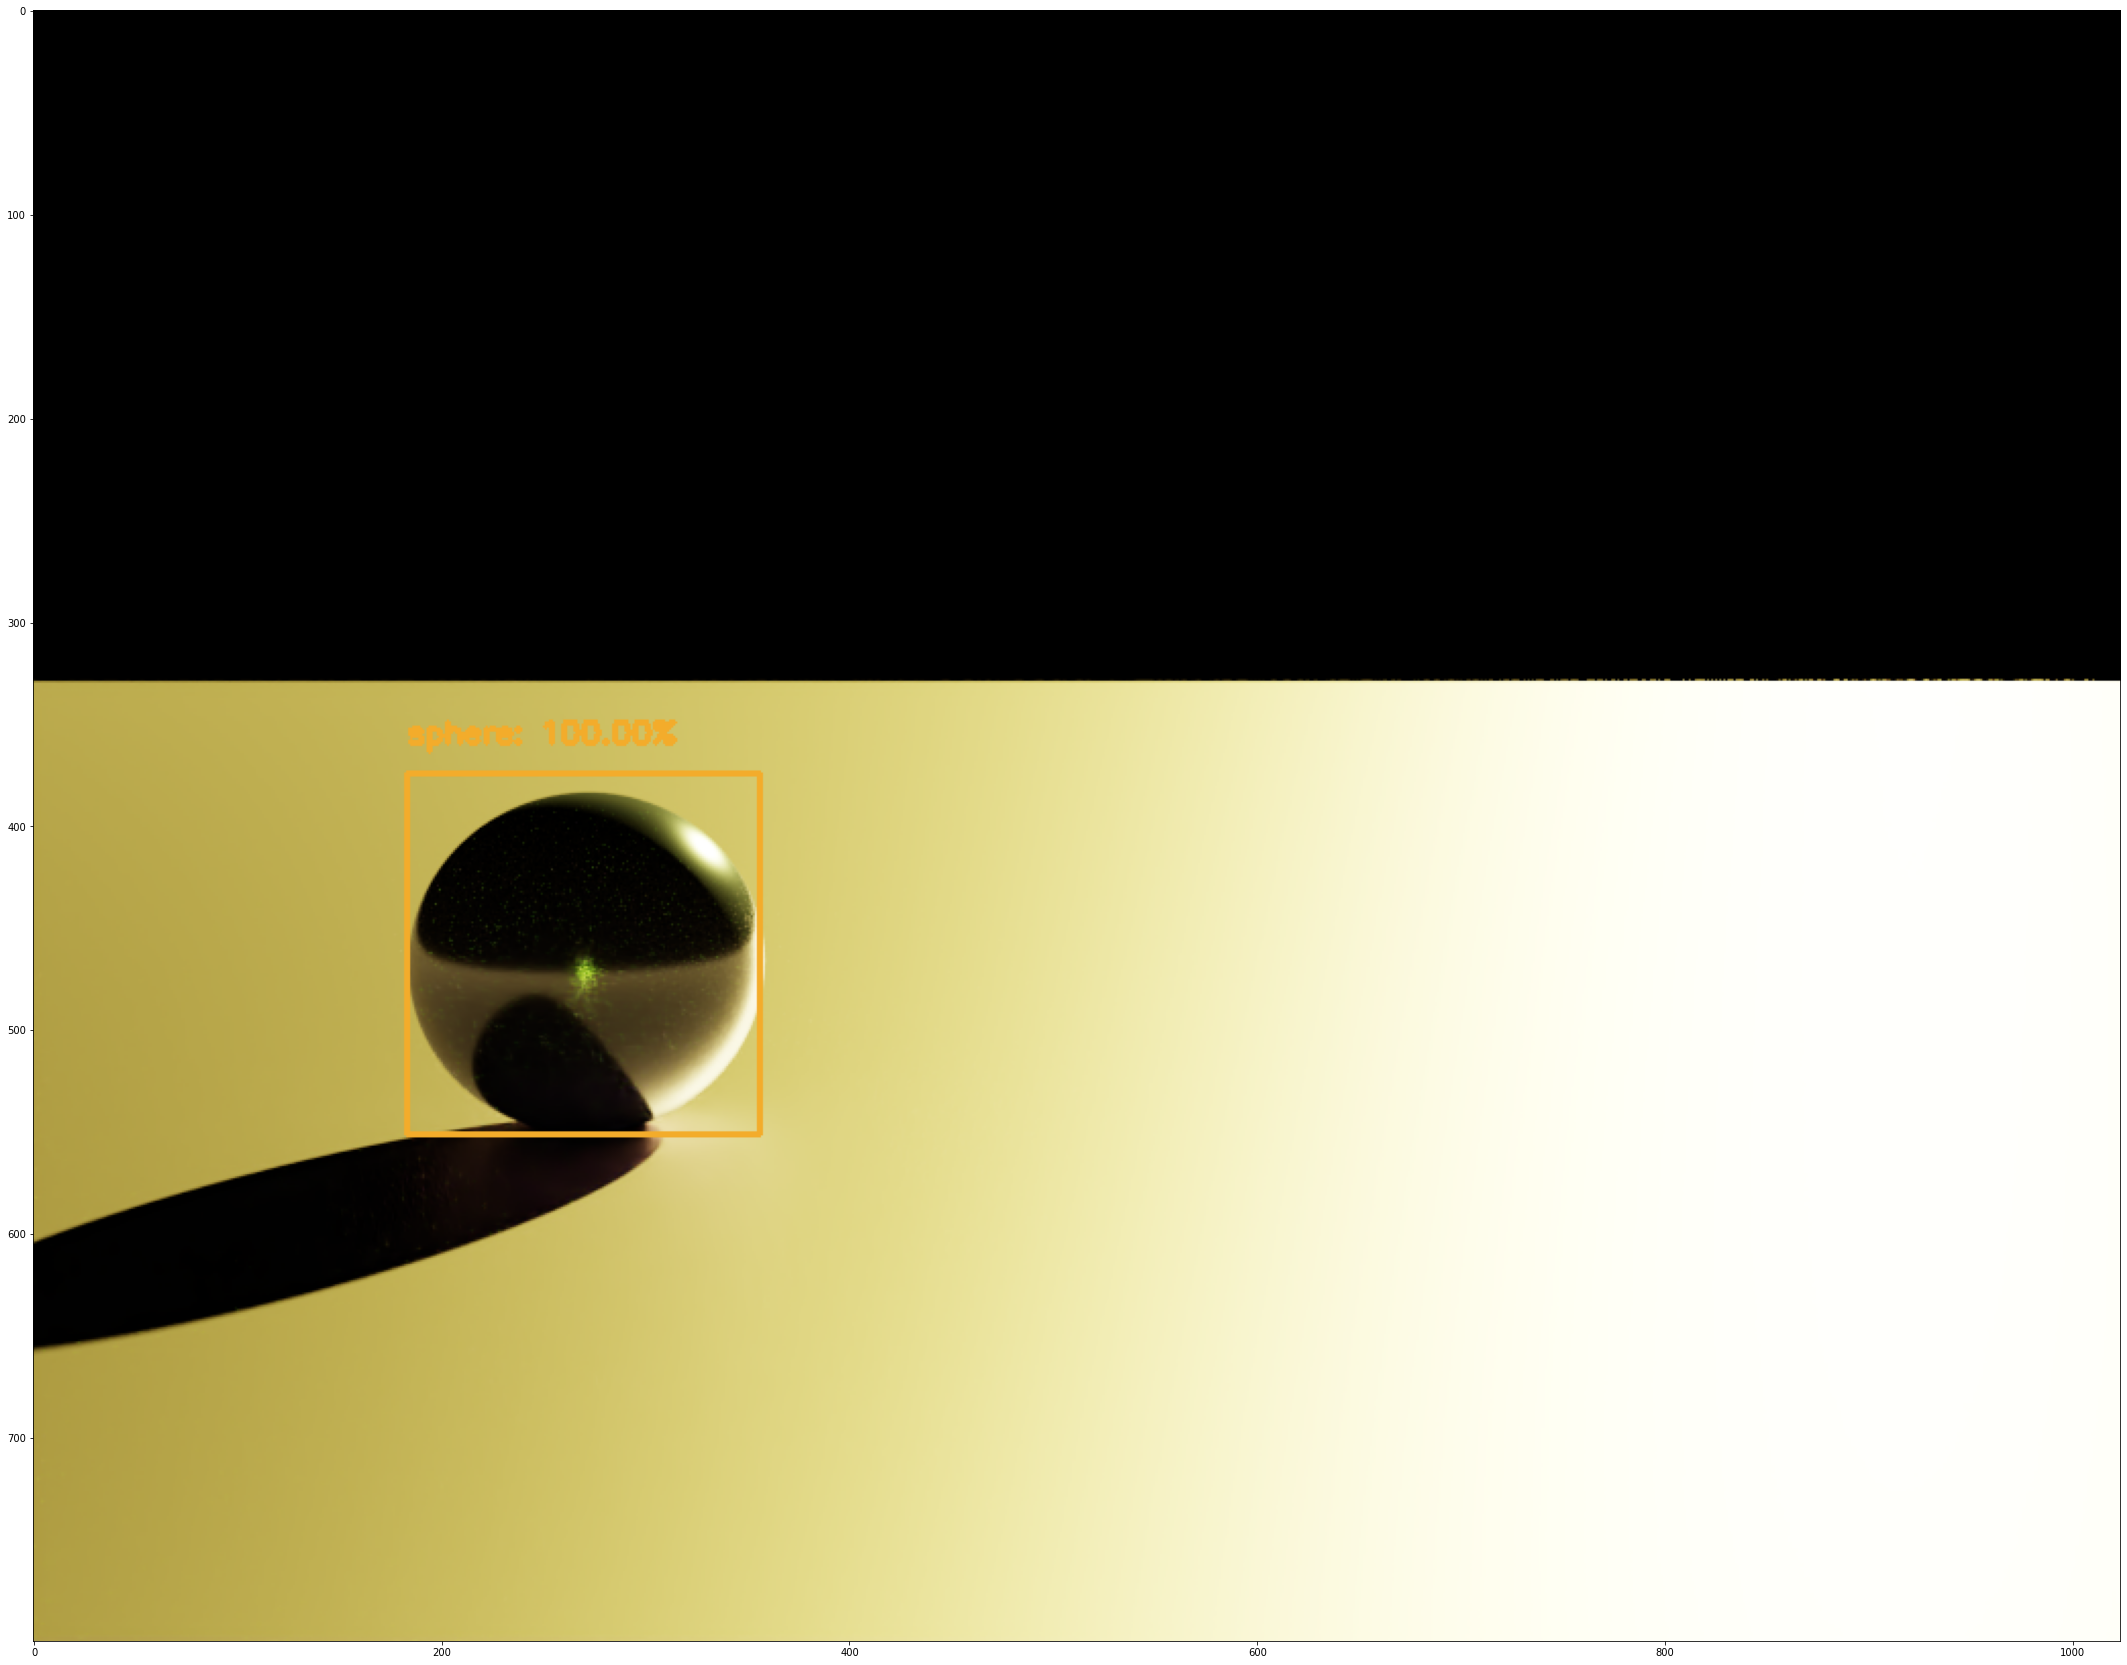

Simulation App Shutting Down
] startup
[3.012s] [ext: omni.isaac.motion_planning-0.1.7] startup
[3.018s] [ext: omni.isaac.kit-0.1.2] startup
[3.019s] [ext: omni.isaac.motion_generation-0.1.2] startup
[3.022s] [ext: omni.isaac.kaya-0.0.0] startup
[3.024s] [ext: omni.isaac.universal_robots-0.1.1] startup
[3.025s] [ext: omni.kit.window.file-1.3.5] startup
[3.126s] [ext: omni.kit.widget.settings-1.0.0] startup
[3.127s] [ext: omni.kit.widget.stage-2.6.8] startup
[3.130s] [ext: omni.kit.window.content_browser-2.4.10] startup
[3.238s] [ext: omni.kit.window.preferences-1.1.5] startup
[3.265s] [ext: omni.kit.usd_undo-0.1.0] startup
[3.266s] [ext: omni.kit.widget.stage_icons-1.0.2] startup
[3.268s] [ext: omni.kit.property.usd-3.11.4] startup
[3.292s] [ext: omni.debugdraw-0.1.0] startup
[3.296s] [ext: omni.physx.commands-1.3.14-5.1] startup
[3.304s] [ext: omni.kit.window.stage-2.3.4] startup
[3.309s] [ext: omni.physx.ui-1.3.14-5.1] startup
[3.325s] [ext: omni.kit.property.material-1.7.2] startup


2022-05-05 22:14:38 [33,058ms] [Error] [omni.ext.impl._internal] omni.syntheticdata-0.1.6 -> <class 'omni.syntheticdata.scripts.extension.Extension'>: extension object is still alive, something holds a reference on it. References: ["[0]:type: <class 'cell'>, id: 140170144835408"]
2022-05-05 22:14:40 [35,034ms] [Error] [omni.ext.impl._internal] omni.kit.menu.utils-1.0.2 -> <class 'omni.kit.menu.utils.scripts.utils.MenuUtilsExtension'>: extension object is still alive, something holds a reference on it. References: ["[0]:type: <class 'frame'>, id: 140213636888656"]


hutdown
[32.552s] [ext: omni.physx.vehicle-1.3.14-5.1] shutdown
[32.569s] [ext: omni.kit.property.physx-0.1.0] shutdown
[32.583s] [ext: omni.physx.cct-1.3.14-5.1] shutdown
[32.595s] [ext: omni.physx.demos-1.3.14-5.1] shutdown
[32.607s] [ext: omni.physx.tests-1.3.14-5.1] shutdown
[32.618s] [ext: omni.physx.ui-1.3.14-5.1] shutdown
[32.633s] [ext: omni.physx.commands-1.3.14-5.1] shutdown
[32.644s] [ext: omni.isaac.contact_sensor-0.1.0] shutdown
[32.689s] [ext: omni.isaac.dofbot-0.1.1] shutdown
[32.689s] [ext: omni.isaac.dr-0.1.8] shutdown
[32.697s] [ext: omni.isaac.jetbot-0.0.0] shutdown
[32.697s] [ext: omni.isaac.franka-0.0.0] shutdown
[32.697s] [ext: omni.isaac.kaya-0.0.0] shutdown
[32.698s] [ext: omni.isaac.universal_robots-0.1.1] shutdown
[32.698s] [ext: omni.isaac.motion_generation-0.1.2] shutdown
[32.698s] [ext: omni.isaac.motion_planning-0.1.7] shutdown
[32.699s] [ext: omni.isaac.occupancy_map-0.1.1] shutdown
[32.781s] [ext: omni.isaac.python_app-0.0.0] shutdown
[32.781s] [ext: omn

In [6]:
import cv2
from omni.isaac.synthetic_utils import SyntheticDataHelper
import omni.syntheticdata._syntheticdata as gt
import matplotlib.pyplot as plt
from IPython.display import clear_output
from PIL import Image
import asyncio
import omni


CLASSES = ["sphere"]

COLORS = np.random.uniform(0,255,size=(len(CLASSES),3))

stage = omni.usd.get_context().get_stage()
settings_interface = carb.settings.acquire_settings_interface()
# Simulation - required to create the viewport instance
viewport_interface = omni.kit.viewport.get_viewport_interface()
# Simulation - required to transform the viewport view into an rgb image
sd_helper = SyntheticDataHelper()

#TODO Implement jetbot steering with Dynamic control
drivers = []
from pxr import UsdPhysics
jetbot_joint_r = UsdPhysics.DriveAPI.Get(stage.GetPrimAtPath("/World/jetbot/chassis/right_wheel_joint"), "angular")
jetbot_joint_l = UsdPhysics.DriveAPI.Get(stage.GetPrimAtPath("/World/jetbot/chassis/left_wheel_joint"), "angular")

jetbot_joint_r.GetStiffnessAttr().Set(0)
jetbot_joint_l.GetStiffnessAttr().Set(0)

from omni.isaac.dynamic_control import _dynamic_control
import numpy as np
dc = _dynamic_control.acquire_dynamic_control_interface()


#Simulation - getting the instance and be able to choose the jetbot camera
viewport_handle = viewport_interface.get_instance('Viewport')
viewport_window = viewport_interface.get_viewport_window(viewport_handle)
jetbot_camera_path = "/World/jetbot/chassis/rgb_camera/jetbot_camera"
viewport_window.set_active_camera(jetbot_camera_path)

#viewport_window = viewport_interface.get_viewport_window().set_active_camera(jetbot_camera_path)

net = cv2.dnn.readNetFromTensorflow('data/simple_sphere/frozen_inference_graph.pb', 'data/simple_sphere/final_graph.pbtxt')
i=0
# Simulation - the condition is dependent on the simulation_app running

omni.timeline.get_timeline_interface().play()


#Note: getting the articulation has to happen after changing the drive stiffness
articulation = dc.get_articulation("/World/jetbot/chassis")
print(articulation)
dc.wake_up_articulation(articulation)
dof_ptr = dc.find_articulation_dof(articulation, "right_wheel_joint")
print(dof_ptr)
dc.set_dof_velocity_target(dof_ptr, 0.2)


while kit.is_running() and i<2000:
    kit.update()
#     clear_output(wait=True) #clearing the jupyter output for updating the plot with a new image
    #Simulation - getting the rgb image from the viewport window
    gt = sd_helper.get_groundtruth(["rgb"], viewport_window)
    input_image = cv2.cvtColor(gt["rgb"], cv2.COLOR_RGBA2RGB)
    (h,w) = input_image.shape[:2]
    print("Image input size: " + str(h) + ", " + str(w))
    blob = cv2.dnn.blobFromImage(image=cv2.resize(input_image,(w,h)), scalefactor=1.0, size=(300,300), swapRB=True)
    net.setInput(blob)
    detections = net.forward()
    for j in np.arange(0, detections.shape[2]):
        confidence = detections[0,0,j,2]
        if confidence > 0.70:
            idx = int(detections[0,0,j,1])
            box = detections[0,0,j,3:7] * np.array([w,h,w,h])
            (startX, startY, endX, endY) = box.astype("int")
            print("Id: " + str(idx))
            label = "{}: {:.2f}%".format(CLASSES[0], confidence*100)
            print(label)
            cv2.rectangle(input_image, (startX,startY), (endX,endY), COLORS[0],2)
            y = startY - 15 if startY - 15 > 15 else startY + 15
            cv2.putText(input_image, label, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, COLORS[0],2)
            plt.rcParams["figure.figsize"] = (200,30)
            plt.imshow(input_image)
            plt.show()
#         if i >= 0 and i < 1000:
        # Simulation - moving the jetbot forward
#         my_jetbot.apply_wheel_actions(my_controller.forward(command=[10, 0]))
        i+=1

omni.timeline.get_timeline_interface().stop()
kit.close()

In [7]:
kit.close()